# PCA кейс Анализ генотипов

Анализ будет производится на основе данных статьи:

> Armando Semo, Magdalena Gayà-Vidal, Cesar Fortes-Lima, Bérénice Alard, Sandra Oliveira, João Almeida, António Prista, Albertino Damasceno, Anne-Maria Fehn, Carina Schlebusch, Jorge Rocha, Along the Indian Ocean Coast: Genomic Variation in Mozambique Provides New Insights into the Bantu Expansion, Molecular Biology and Evolution, Volume 37, Issue 2, February 2020, Pages 406–416, https://doi.org/10.1093/molbev/msz224

Данные в сыром виде представлены в базе данных ArrayExpress - https://www.ebi.ac.uk/biostudies/arrayexpress/studies/E-MTAB-8450?query=E-MTAB-8450

И так же используются данные из супплемента статьи.

## Получение данных

Данные генотипирования могут быть получены с использованием нескольких технологий:

1.С использованием ДНКовых микрочипов.

2.С использованием секвенирования.


В обоих случаях результатом предварительной обработки будет набор SNP и инделей для каждого из учавствующих в анализе индивидов. В большинстве случаев наиболее удобным форматом представления таких данных будет формат программы plink.

Получение файлов такого формата будет зависеть от использованной технологии секвенирования:

1. В случае **генотипирования с помощью микрочипов**, данные в формате plink получают с использованием специального программного обеспечения предоставляемого производетелем оборудования для проведения микрочипового эксперимента.

Публичные данные такого типа доступны в базе данных ArrayExpress - https://www.ebi.ac.uk/biostudies/arrayexpress

2. В **случае секвенирования(WGS, WES, таргетного)** в результате предварительной обработки в большинстве случаев будет получен файл в формате VCF, который можно конверитровать в формат plink с использованием следующего запуска программы Plink версии 1.9:

```
plink --vcf input_file.vcf --make-bed --out output_prefix
```
Где:

``` input_file.vcf ``` — это ваш VCF-файл.

``` --make-bed ``` — параметр, который указывает, что нужно создать бинарные PLINK файлы (.bed, .bim, .fam).

```output_prefix``` — префикс для выходных файлов (например, ```output_prefix.bed```, ```output_prefix.bim```, ```output_prefix.fam```).

Публичные данные такого типа доступны в базе данных SRA - https://www.ncbi.nlm.nih.gov/sra

Формат plink на самом деле представляет собой совокупность двух форматов: текстового(ped/map) и бинарного(bed/bim/fam)

Текстовый plink формат состоит из двух файлов:

1.```data.map``` - описание SNP

2.```data.ped``` - данные генотипов

Бинарный plink формат состоит из трёх файлов:

1.```data.bim``` - описание SNP

2.```data.bed``` - данные генотипов в бинарном формате

3.```data.fam``` - описание индивидов

Для практикума будем использовать данные из статьи[Armando Semo et al., 2019], в которой представлены данные генотипирования образцов индивидов из разных частей Мозамбика с использованием ДНК - микрочипов.
Сырые данные можно скачать из базы данных ArrayExpress - https://www.ebi.ac.uk/biostudies/arrayexpress/studies/E-MTAB-8450?query=E-MTAB-8450

In [1]:
!pip install pycaret

In [1]:
# Скачиваем и распаковываем PLINK
!wget https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20241022.zip
!unzip plink_linux_x86_64_20241022.zip
!chmod +x plinky

--2025-04-12 11:42:19--  https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20241022.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.141.248, 52.217.123.128, 52.217.128.48, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.141.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8954192 (8.5M) [application/zip]
Saving to: ‘plink_linux_x86_64_20241022.zip.1’

plink_linux_x86_64_ 100%[===================>]   8.54M  32.5MB/s    in 0.3s    

2025-04-12 11:42:20 (32.5 MB/s) - ‘plink_linux_x86_64_20241022.zip.1’ saved [8954192/8954192]

Archive:  plink_linux_x86_64_20241022.zip
replace plink? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: plink                   
replace LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: LICENSE                 
replace toy.ped? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: toy.ped                 
replace toy.map? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: toy.map      

In [3]:
!./plink --help

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3

In the command line flag definitions that follow,
  * <angle brackets> denote a required parameter, where the text between the
    angle brackets describes its nature.
  * ['square brackets + single-quotes'] denotes an optional modifier.  Use the
    EXACT text in the quotes.
  * [{bar|separated|braced|bracketed|values}] denotes a collection of mutually
    exclusive optional modifiers (again, the exact text must be used).  When
    there are no outer square brackets, one of the choices must be selected.
  * ['quoted_text='<description of value>] denotes an optional modifier that
    must begin with the quoted text, and be followed by a value with no
    whitespace in between.  '|' may also be used here to indicate mutually
    exclusive options.
  * [square brackets without quotes or braces] denote an optional parameter,
    whe

Загрузка файлов

In [4]:
from google.colab import files
uploaded = files.upload()

Saving africa_UNPrem.bed to africa_UNPrem.bed
Saving africa_UNPrem.bim to africa_UNPrem.bim
Saving africa_UNPrem.fam to africa_UNPrem.fam
Saving africa_UNPrem_pops.txt to africa_UNPrem_pops.txt
Saving africa_UNPrem_pops_and_coors.txt to africa_UNPrem_pops_and_coors.txt


Обработка данных

In [9]:
!./plink --bfile africa_UNPrem --snps-only --make-bed --out africa_snps_only

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to africa_snps_only.log.
Options in effect:
  --bfile africa_UNPrem
  --make-bed
  --out africa_snps_only
  --snps-only

12978 MB RAM detected; reserving 6489 MB for main workspace.
607761 variants loaded from .bim file.
696 people (486 males, 210 females) loaded from .fam.
696 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 696 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.995353.
607761 variants and 696 people pass filters and QC.
Among remaining phenotypes, 0 are cases and 696 are controls.
--make-bed to africa_snps_

Проверка корректности геокоординат и названий популяций

In [13]:
import re

pattern = re.compile(r'-?\d+\.\d+')  # шаблон для float чисел
pop_names = set()

with open("africa_UNPrem_pops_and_coors.txt") as f:
    for i, line in enumerate(f, start=1):
        if i == 1:
            continue  # пропускаем заголовок
        line = line.strip()
        if not line:
            continue

        # Заменим запятую на точку в координатах
        parts = line.replace(",", ".").split()
        if len(parts) < 3:
            print(f"Ошибка в строке {i}: недостаточно столбцов")
            continue

        name, lat, lon = parts[0], parts[1], parts[2]

        # Проверка координат на корректный формат
        if not pattern.fullmatch(lat) or not pattern.fullmatch(lon):
            print(f"Ошибка в строке {i}: некорректные координаты lat={lat}, lon={lon}")

        # Проверка на дублирующиеся популяции
        if name in pop_names:
            print(f"Ошибка в строке {i}: дублируется популяция '{name}'")
        else:
            pop_names.add(name)

print("Проверка метаданных с координатами завершена.")


Проверка метаданных с координатами завершена.


In [14]:
!wc -l africa_UNPrem.bim > wc_before_snp.txt
!wc -l africa_snps_only.bim > wc_after_snp.txt

!cat wc_before_snp.txt
!cat wc_after_snp.txt

607761 africa_UNPrem.bim
607761 africa_snps_only.bim


In [15]:
!./plink --bfile africa_snps_only --autosome --make-bed --out africa_autosome

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to africa_autosome.log.
Options in effect:
  --autosome
  --bfile africa_snps_only
  --make-bed
  --out africa_autosome

12978 MB RAM detected; reserving 6489 MB for main workspace.
607761 variants loaded from .bim file.
696 people (486 males, 210 females) loaded from .fam.
696 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 696 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.995353.
607761 variants and 696 people pass filters and QC.
Among remaining phenotypes, 0 are cases and 696 are controls.
--make-bed to africa_autos

In [16]:
!wc -l africa_snps_only.bim > wc_before_autosome.txt
!wc -l africa_autosome.bim > wc_after_autosome.txt

!cat wc_before_autosome.txt
!cat wc_after_autosome.txt

607761 africa_snps_only.bim
607761 africa_autosome.bim


In [17]:
!./plink --bfile africa_autosome --geno 0.1 --mind 0.1 --make-bed --out africa_filtered

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to africa_filtered.log.
Options in effect:
  --bfile africa_autosome
  --geno 0.1
  --make-bed
  --mind 0.1
  --out africa_filtered

12978 MB RAM detected; reserving 6489 MB for main workspace.
607761 variants loaded from .bim file.
696 people (486 males, 210 females) loaded from .fam.
696 phenotype values loaded from .fam.
0 people removed due to missing genotype data (--mind).
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 696 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.995353.
0 variants removed due to missing genotype data (--geno).
607761 variant

In [18]:
!wc -l africa_autosome.bim > wc_before_qc_snp.txt
!wc -l africa_filtered.bim > wc_after_qc_snp.txt

!cat wc_before_qc_snp.txt
!cat wc_after_qc_snp.txt

607761 africa_autosome.bim
607761 africa_filtered.bim


In [19]:
!wc -l africa_autosome.fam > wc_before_qc_indiv.txt
!wc -l africa_filtered.fam > wc_after_qc_indiv.txt

!cat wc_before_qc_indiv.txt
!cat wc_after_qc_indiv.txt

696 africa_autosome.fam
696 africa_filtered.fam


In [20]:
!./plink --bfile africa_filtered --indep-pairwise 200 25 0.4 --out pruned
!./plink --bfile africa_filtered --extract pruned.prune.in --make-bed --out africa_final

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to pruned.log.
Options in effect:
  --bfile africa_filtered
  --indep-pairwise 200 25 0.4
  --out pruned

12978 MB RAM detected; reserving 6489 MB for main workspace.
607761 variants loaded from .bim file.
696 people (486 males, 210 females) loaded from .fam.
696 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 696 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.995353.
607761 variants and 696 people pass filters and QC.
Among remaining phenotypes, 0 are cases and 696 are controls.
Pruned 22689 variants from chromosome 1, 

In [21]:
!wc -l africa_filtered.bim > wc_before_prune.txt
!wc -l africa_final.bim > wc_after_prune.txt

!cat wc_before_prune.txt
!cat wc_after_prune.txt

607761 africa_filtered.bim
350719 africa_final.bim


Сразу в plink отбираем 20 главных компонент

In [22]:
!./plink --bfile africa_final --pca --out pca_result

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to pca_result.log.
Options in effect:
  --bfile africa_final
  --out pca_result
  --pca

12978 MB RAM detected; reserving 6489 MB for main workspace.
350719 variants loaded from .bim file.
696 people (486 males, 210 females) loaded from .fam.
696 phenotype values loaded from .fam.
Using up to 2 threads (change this with --threads).
Before main variant filters, 696 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.995113.
350719 variants and 696 people pass filters and QC.
Among remaining phenotypes, 0 are cases and 696 are controls.
Relationship matrix calculation complete.
--pca: Results saved

## Формируем датафрейм

In [23]:
import pandas as pd

# Загрузим eigenvec
eigenvec = pd.read_csv("pca_result.eigenvec", delim_whitespace=True, header=None)

# Добавим названия колонок
eigenvec.columns = ["FID", "IID"] + [f"PC{i}" for i in range(1, eigenvec.shape[1] - 1)]

In [24]:
pops = pd.read_csv("africa_UNPrem_pops.txt", header=None, names=["Population"])

In [25]:
assert len(eigenvec) == len(pops), "Число индивидуумов не совпадает!"

In [26]:
eigenvec["Population"] = pops["Population"]

In [27]:
coors = pd.read_csv("africa_UNPrem_pops_and_coors.txt", sep="\t")
eigenvec = eigenvec.merge(coors, how="left", left_on="Population", right_on="pop_name")

## Визуализируем распределение выборки по парам главных компонент PC1, PC2, PC3, PC4

<ipython-input-29-e886e7722488>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


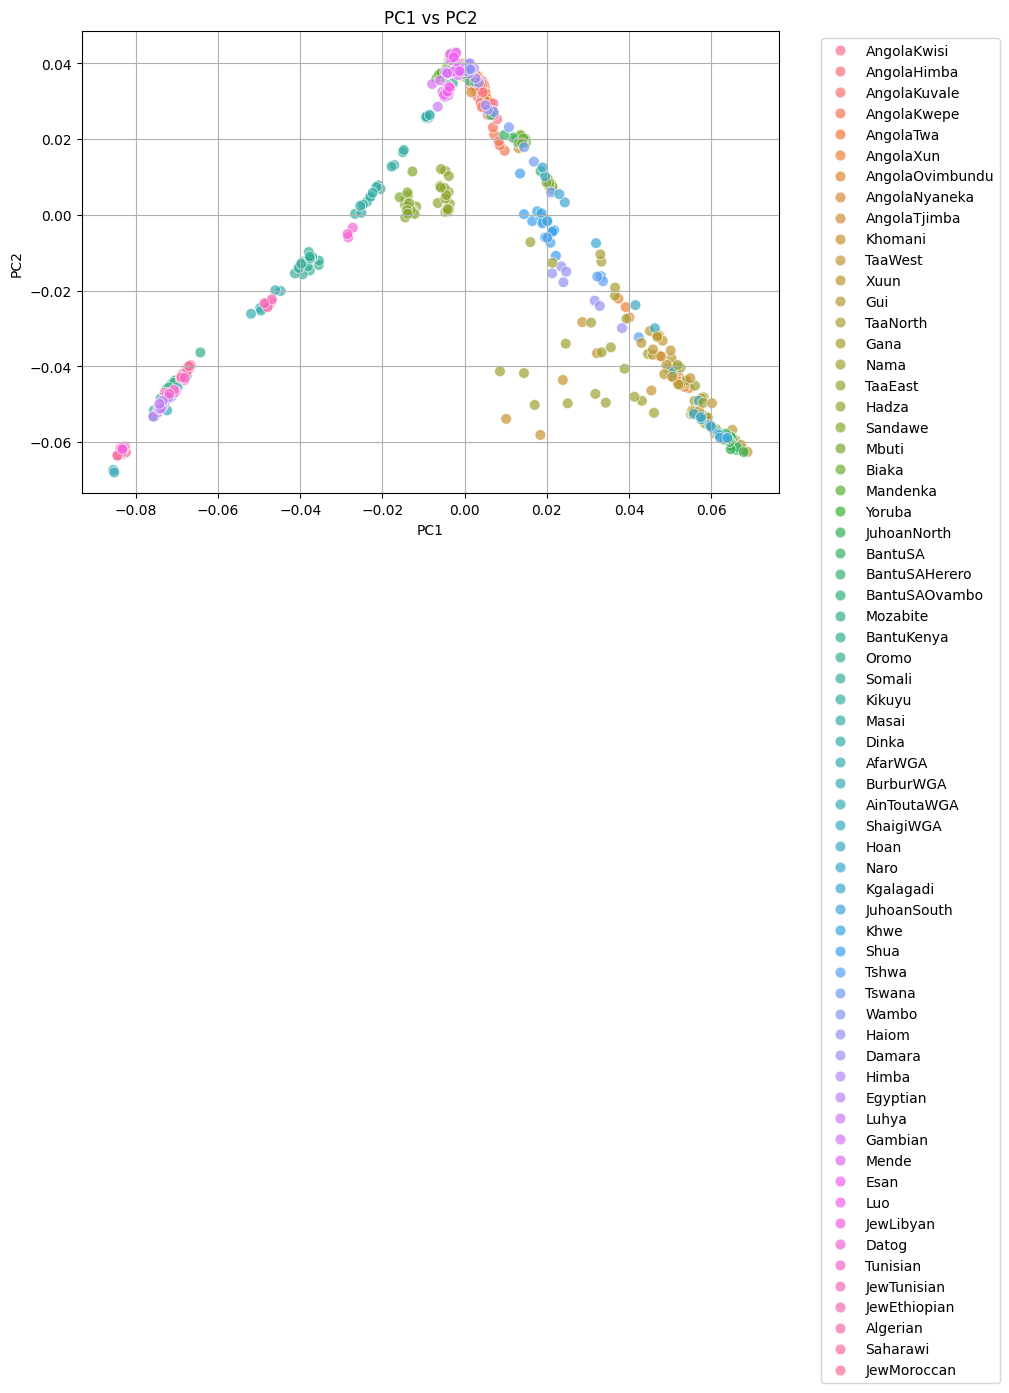

<ipython-input-29-e886e7722488>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


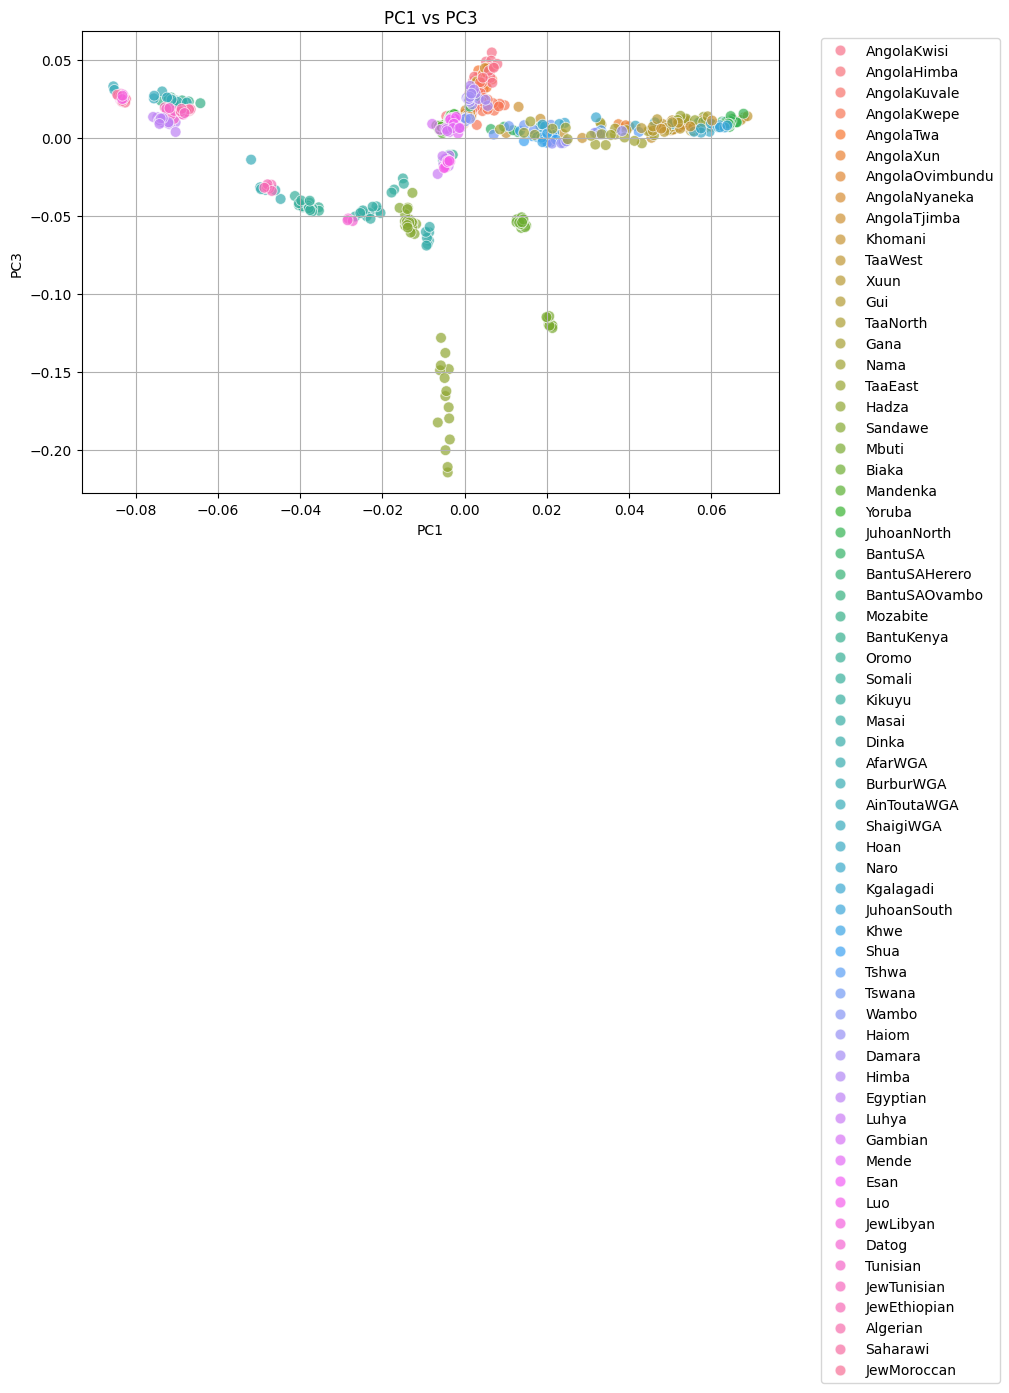

<ipython-input-29-e886e7722488>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


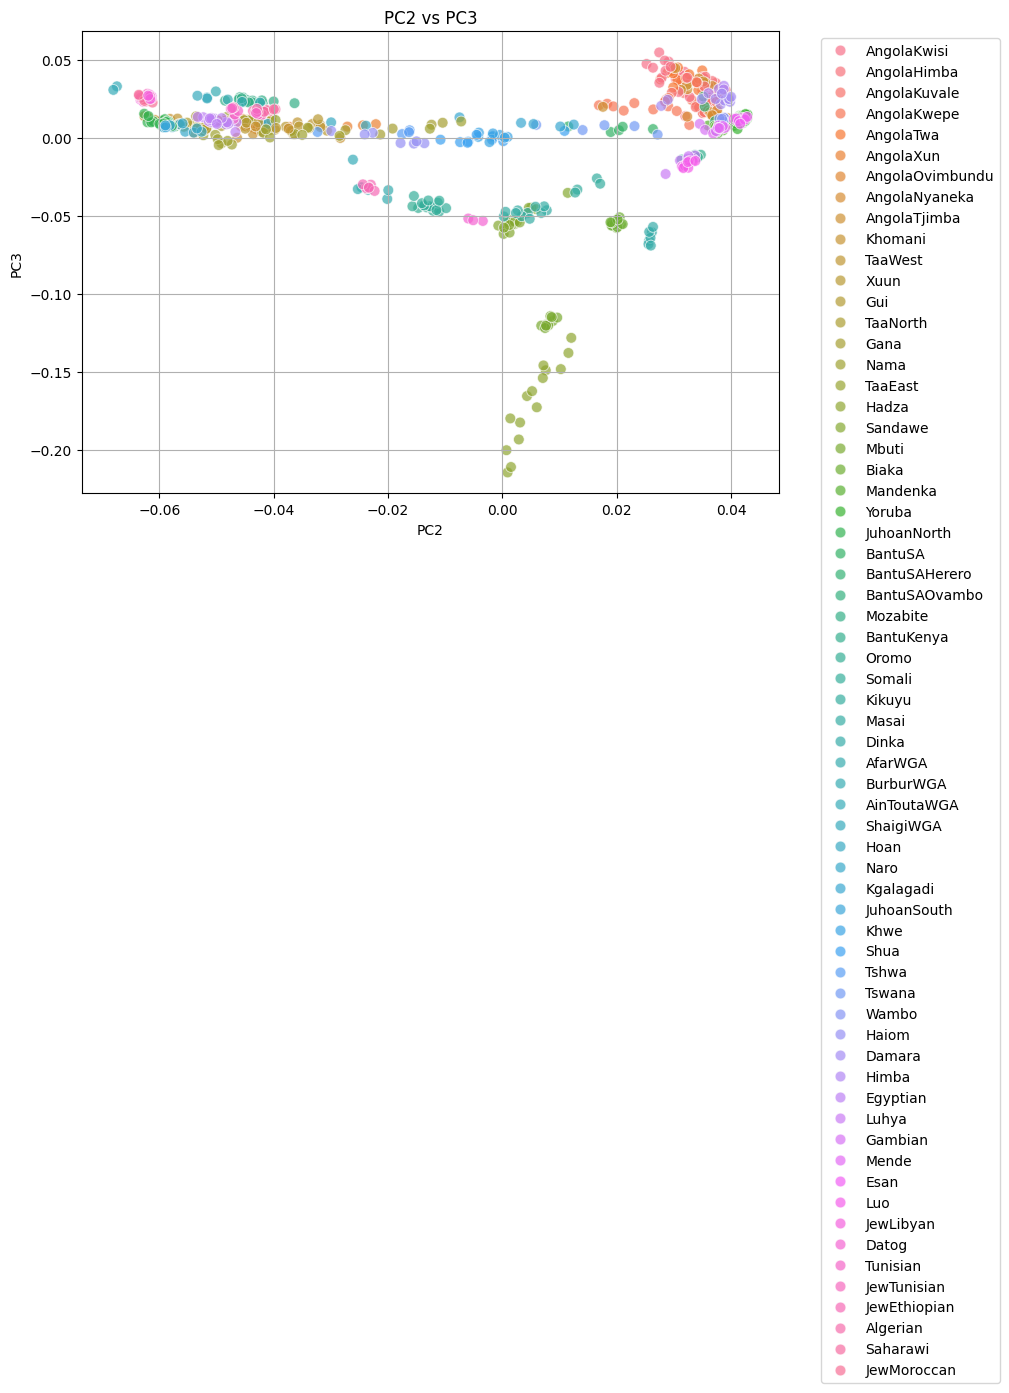

<ipython-input-29-e886e7722488>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


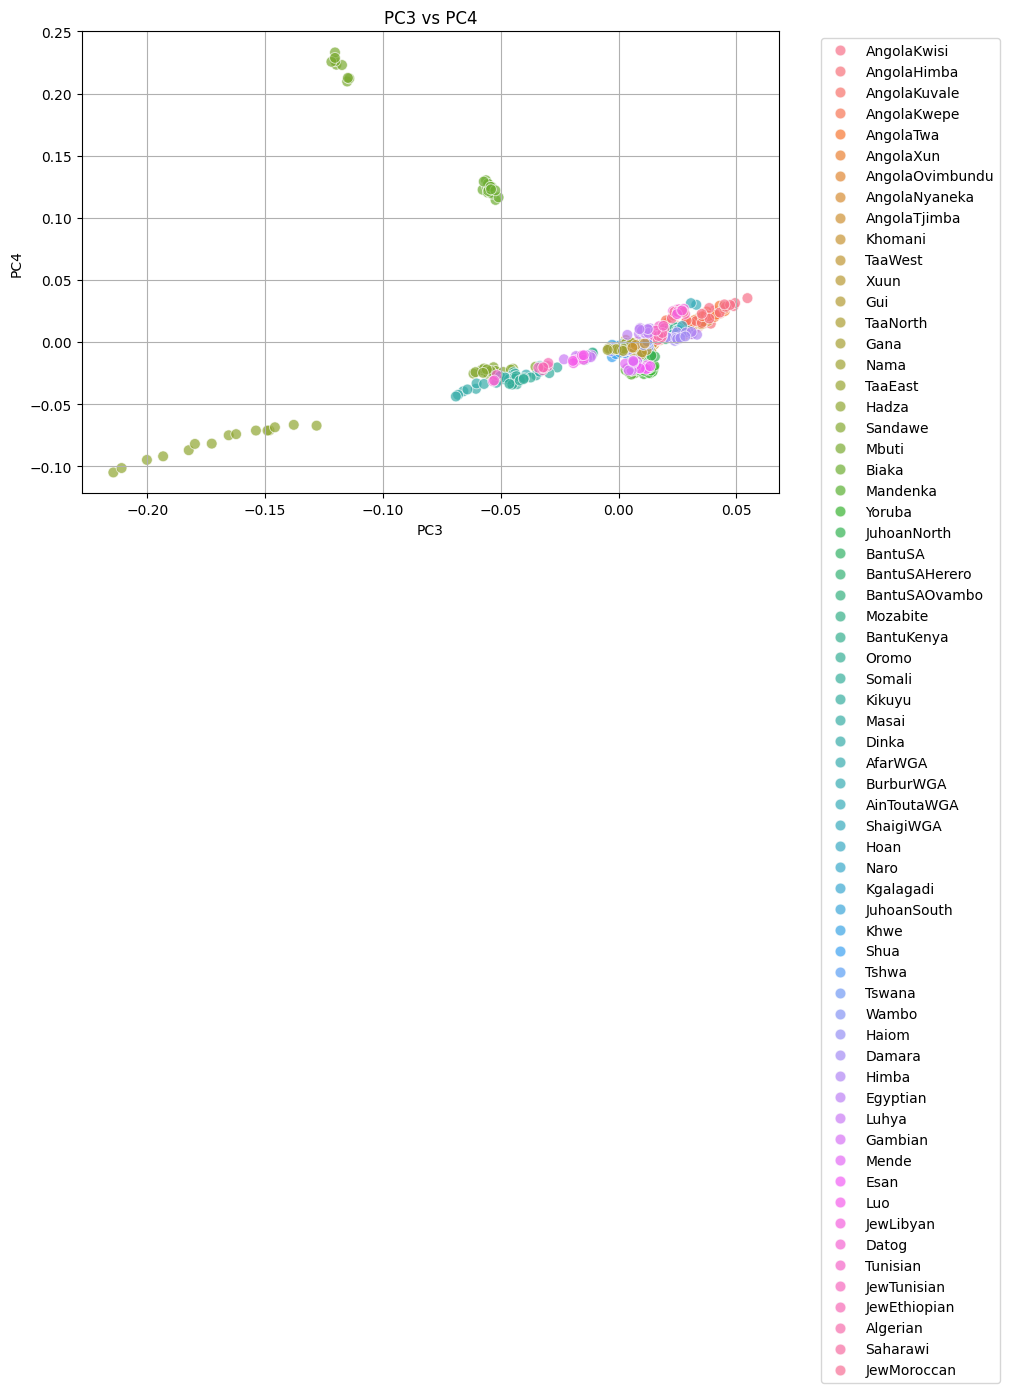

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

def pca_scatter(df, pc_x, pc_y):
    plt.figure(figsize=(9, 6))
    sns.scatterplot(data=df, x=pc_x, y=pc_y, hue="Population", s=60, alpha=0.7)
    plt.title(f"{pc_x} vs {pc_y}")
    plt.grid(True)
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

pca_scatter(eigenvec, "PC1", "PC2")
pca_scatter(eigenvec, "PC1", "PC3")
pca_scatter(eigenvec, "PC2", "PC3")
pca_scatter(eigenvec, "PC3", "PC4")

## Загружаем `eigenval`, полученный из PLINK, и рассчитываем, какой вклад вносят первые компоненты в общую дисперсию.  

In [31]:
eigenval = pd.read_csv("pca_result.eigenval", header=None, names=["eigenval"])
eigenval["explained_pct"] = eigenval["eigenval"] / eigenval["eigenval"].sum() * 100
eigenval.head(10)

eigenval  explained_pct
0  35.22690      36.382627
1  22.12990      22.855939
2   4.14406       4.280019
3   3.53702       3.653063
4   3.24730       3.353838
5   2.87244       2.966679
6   2.52324       2.606023
7   2.19855       2.270680
8   2.15751       2.228294
9   2.10441       2.173452

## Визуализация доли объяснённой дисперсии первых 10 PCA-компонент

<ipython-input-32-db50aeea75a9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=eigenval.index[:10]+1, y=eigenval["explained_pct"][:10], palette="coolwarm")


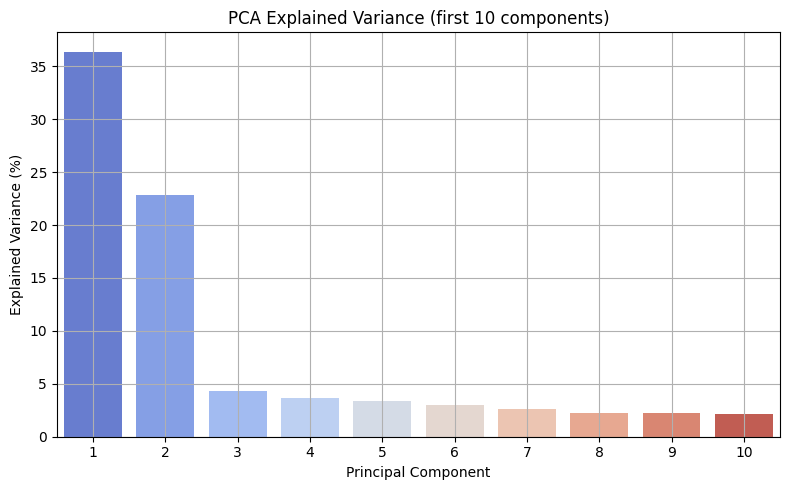

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(x=eigenval.index[:10]+1, y=eigenval["explained_pct"][:10], palette="coolwarm")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (%)")
plt.title("PCA Explained Variance (first 10 components)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Cumulative Explained Variance (накопленная дисперсия)

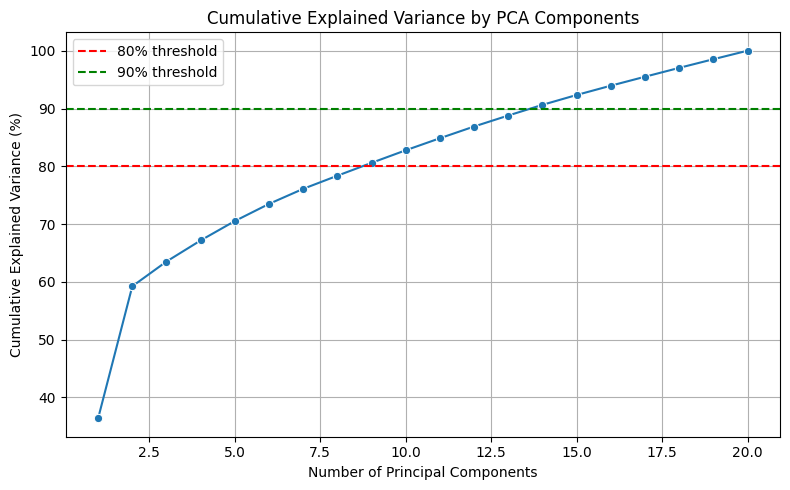

In [33]:
# Добавим к датафрейму кумулятивную сумму
eigenval["cumulative_pct"] = eigenval["explained_pct"].cumsum()

# График
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, len(eigenval)+1), y=eigenval["cumulative_pct"], marker='o')
plt.axhline(80, color='red', linestyle='--', label='80% threshold')
plt.axhline(90, color='green', linestyle='--', label='90% threshold')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Cumulative Explained Variance by PCA Components")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
# Приводим координаты к float (на всякий случай заменяем запятые)
eigenvec["Latitude"] = eigenvec["Latitude"].astype(str).str.replace(",", ".", regex=False).astype(float)
eigenvec["Longitude"] = eigenvec["Longitude"].astype(str).str.replace(",", ".", regex=False).astype(float)

print(eigenvec[["Latitude", "Longitude"]].dtypes)

Latitude     float64
Longitude    float64
dtype: object


## Ищем зависимости главных компонент и координат двумя способами - матрицей корреляции и моделью линейной регрессии

In [36]:
# Отбираем только нужные столбцы
pc_cols = [f"PC{i}" for i in range(1, 21)]
geo_cols = ["Latitude", "Longitude"]

# Считаем корреляции
corr_matrix = eigenvec[pc_cols + geo_cols].corr()

# Отбираем только корреляции между PC и координатами
geo_corr = corr_matrix.loc[pc_cols, geo_cols]
print(geo_corr)

      Latitude  Longitude
PC1  -0.730169   0.088327
PC2   0.107103  -0.238899
PC3   0.207142  -0.533318
PC4   0.153194  -0.071527
PC5   0.095984   0.260715
PC6   0.356112  -0.083256
PC7  -0.097274   0.457665
PC8  -0.020438  -0.037607
PC9  -0.089062   0.124625
PC10 -0.077570  -0.042197
PC11  0.148118  -0.199923
PC12 -0.068319   0.050939
PC13  0.039877  -0.034515
PC14  0.213627   0.092979
PC15 -0.066059   0.060258
PC16 -0.017412  -0.107496
PC17 -0.029536   0.041047
PC18 -0.176067   0.205766
PC19  0.007009   0.031788
PC20  0.004711   0.028756


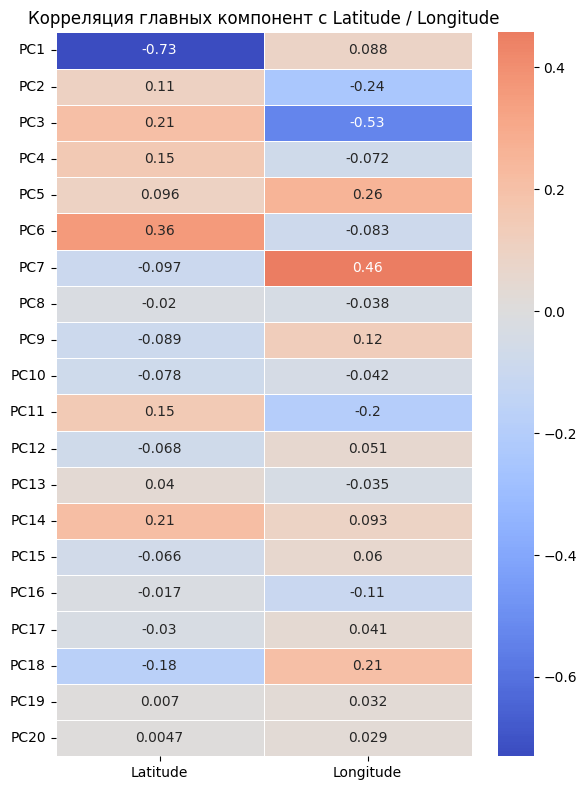

In [39]:
plt.figure(figsize=(6, 8))
sns.heatmap(geo_corr, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Корреляция главных компонент с Latitude / Longitude")
plt.tight_layout()
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

for pc in pc_cols:
    X = eigenvec[["Latitude", "Longitude"]]
    y = eigenvec[pc]
    model = LinearRegression().fit(X, y)
    r2 = r2_score(y, model.predict(X))
    print(f"{pc}: R² = {r2:.4f}")

PC1: R² = 0.5724
PC2: R² = 0.0575
PC3: R² = 0.2845
PC4: R² = 0.0237
PC5: R² = 0.1113
PC6: R² = 0.1297
PC7: R² = 0.2157
PC8: R² = 0.0028
PC9: R² = 0.0176
PC10: R² = 0.0119
PC11: R² = 0.0463
PC12: R² = 0.0054
PC13: R² = 0.0020
PC14: R² = 0.0802
PC15: R² = 0.0058
PC16: R² = 0.0154
PC17: R² = 0.0019
PC18: R² = 0.0538
PC19: R² = 0.0014
PC20: R² = 0.0011


<ipython-input-38-edf9161c9214>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(1, 21)), y=r2_values, palette="viridis")


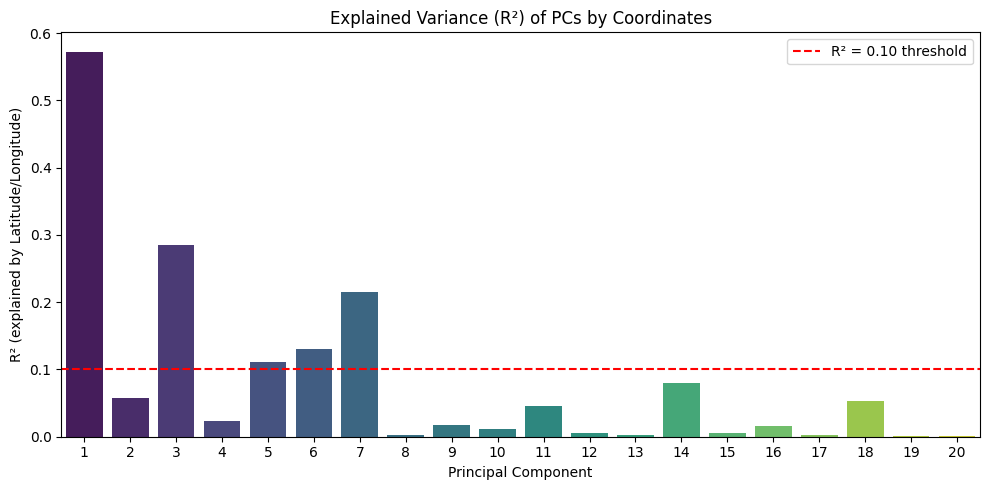

In [38]:
r2_values = [
    0.5724, 0.0575, 0.2845, 0.0237, 0.1113, 0.1297, 0.2157, 0.0028, 0.0176, 0.0119,
    0.0463, 0.0054, 0.0020, 0.0802, 0.0058, 0.0154, 0.0019, 0.0538, 0.0014, 0.0011
]

plt.figure(figsize=(10, 5))
sns.barplot(x=list(range(1, 21)), y=r2_values, palette="viridis")
plt.axhline(0.1, ls='--', color='red', label="R² = 0.10 threshold")
plt.xlabel("Principal Component")
plt.ylabel("R² (explained by Latitude/Longitude)")
plt.title("Explained Variance (R²) of PCs by Coordinates")
plt.legend()
plt.tight_layout()
plt.show()

## Подсчёт p-value для каждой регрессии

In [40]:
import statsmodels.api as sm

pvals = []

for pc in pc_cols:
    X = eigenvec[["Latitude", "Longitude"]]
    y = eigenvec[pc]
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    pvals.append(model.pvalues)

pvals_df = pd.DataFrame(pvals, index=pc_cols)
pvals_df.columns.name = "Feature"
pvals_df.head()

Feature         const       Latitude     Longitude
PC1      3.936683e-22  8.906142e-129  6.448522e-15
PC2      9.236553e-06   5.974970e-01  9.287428e-09
PC3      8.537914e-30   7.781510e-01  9.958867e-46
PC4      8.964647e-01   3.007898e-04  6.785852e-01
PC5      5.012904e-14   9.421421e-09  4.054107e-18

## Визуализация остатков (residuals)

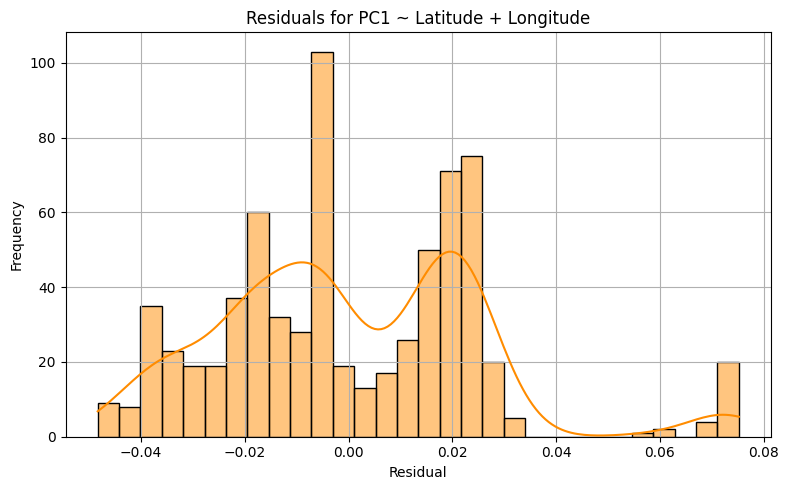

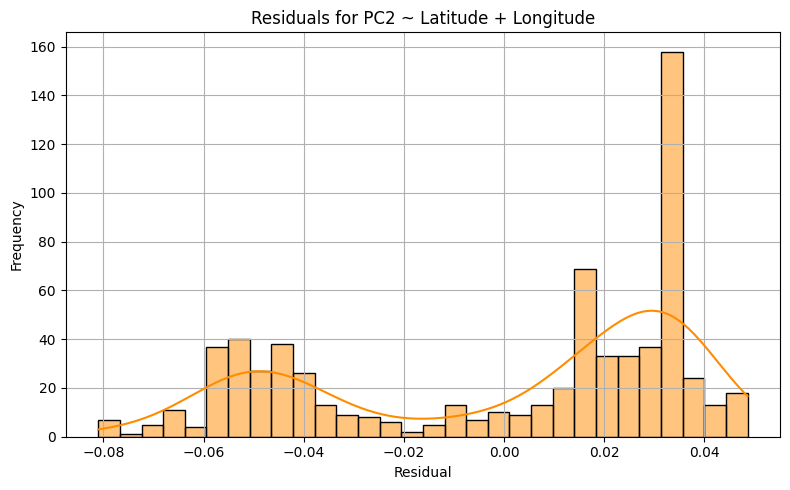

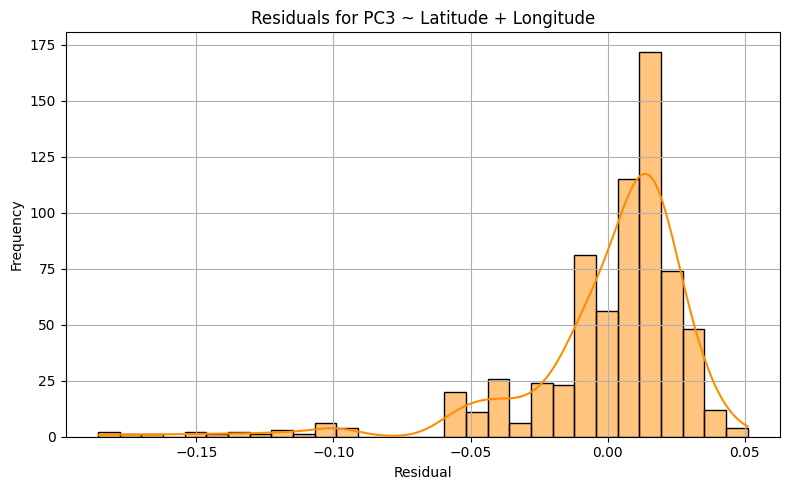

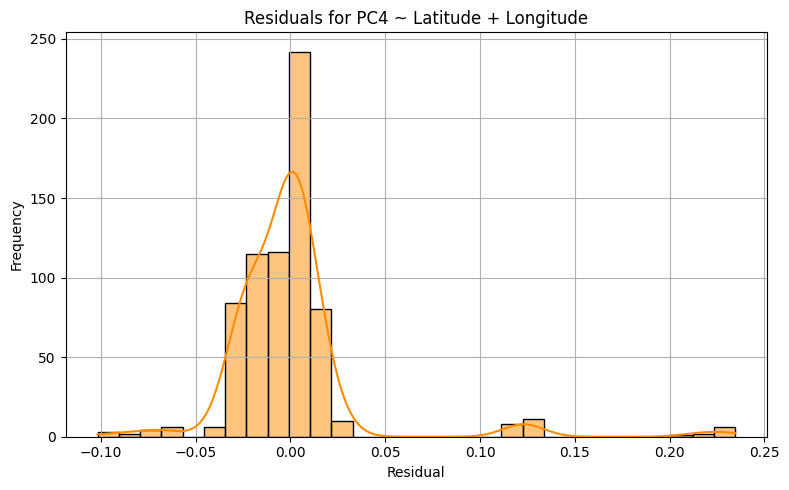

In [42]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

X = eigenvec[["Latitude", "Longitude"]]

for pc in [f"PC{i}" for i in range(1, 5)]:
    y = eigenvec[pc]
    model = LinearRegression().fit(X, y)
    residuals = y - model.predict(X)

    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, bins=30, kde=True, color="darkorange")
    plt.title(f"Residuals for {pc} ~ Latitude + Longitude")
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Пики KDE-кривой (ядерной оценки плотности) на гистограмме совпадают с концентрациями баров, значит:

остатки распределены более-менее нормально (или хотя бы не имеют ярко выраженных аномалий),

модель адекватно "уловила" линейную зависимость между координатами и компонентой,

не видно ярких смещений, выбросов или паттернов, которые модель бы не смогла уловить.

## Программа минимум
1. Подготовка датасета для PCA
Данные прошли полный цикл подготовки: от исходного бинарного формата (.bed/.bim/.fam) через фильтрацию по SNP, индивидуумам, аутосомам и коррелированным вариантам (LD pruning) до финального набора (africa_final). Использовались команды PLINK с фильтрами --snps-only, --autosome, --geno, --mind, --indep-pairwise.

2. Проведение PCA
Анализ главных компонент выполнен с помощью PLINK (--pca). Получены координаты индивидов по компонентам в pca_result.eigenvec и значения собственных чисел в pca_result.eigenval.

3. Вклад главных компонент
Были рассчитаны проценты объяснённой дисперсии каждой компонентой. Первая компонента (PC1) объясняет максимальную долю вариации, остальные — значительно меньше, что типично для популяционных данных.

4. Визуализация PCA
Результаты PCA визуализированы с использованием seaborn.scatterplot, цвет точек отражает принадлежность к популяции. Построены графики: PC1 vs PC2, PC1 vs PC3, PC2 vs PC3, PC3 vs PC4 и другие.

## Дополнительные пункты
5. Метаданные
Метаданные были извлечены из файлов africa_UNPrem_pops.txt и africa_UNPrem_pops_and_coors.txt. Координаты соответствуют каждой популяции и были добавлены к PCA-фрейму.

6. Корреляции между PC и координатами
Проведён анализ корреляций между PC1–PC20 и координатами (широта, долгота). Вычислены как линейные корреляции (.corr()), так и R² через линейную регрессию:

Компонента	R² (доля дисперсии, объяснённой координатами)
PC1	0.5724
PC3	0.2845
PC7	0.2157
PC6	0.1297
PC5	0.1113
→ Компоненты PC1, PC3, PC5, PC6, PC7 имеют существенную зависимость от координат и, вероятно, отражают географически обусловленную генетическую структуру.

7. Объясняют ли координаты >10% дисперсии?
Да. Координаты сбора образцов объясняют значимую долю дисперсии по компонентам PC1, PC3, PC5, PC6 и PC7. Особенно сильно выражено для PC1 (57.2% дисперсии).

8. Графики не только для PC1–PC2
Дополнительно построены графики:

PC1 vs PC3

PC2 vs PC3

PC3 vs PC4
Это позволило выявить географические кластеры и локальные особенности распределения.

9. Надёжность эффекта по PC4
На компоненте PC4 была обнаружена некоторая структура. Однако доля дисперсии, объясняемая географией, составляет всего 2.3% (R² = 0.0237). Это значительно ниже, чем у PC1 (57.2%). Следовательно:

Результаты, полученные по PC4, являются менее надёжными, так как не поддерживаются географической структурой и могут быть случайными или вторичными.

## Смотрим отдельно популяции Анголы

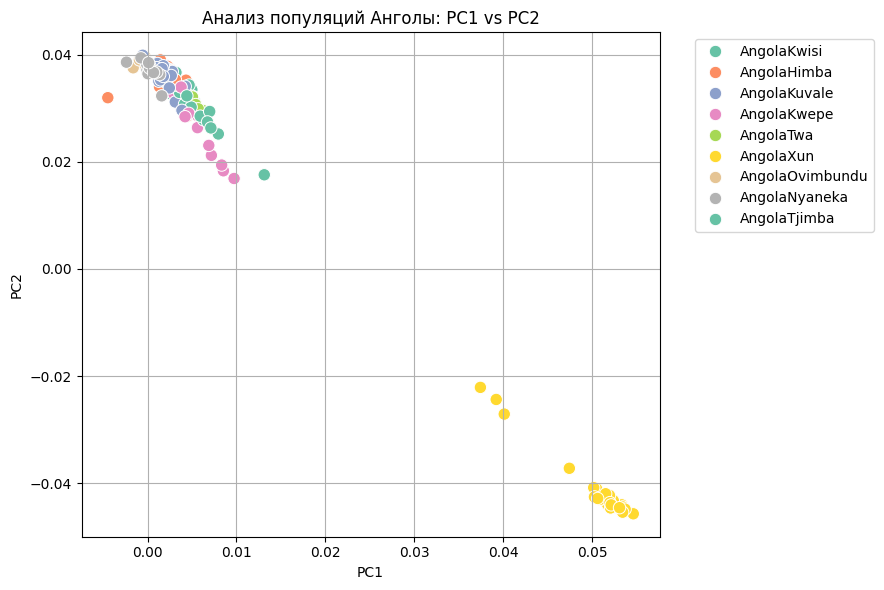

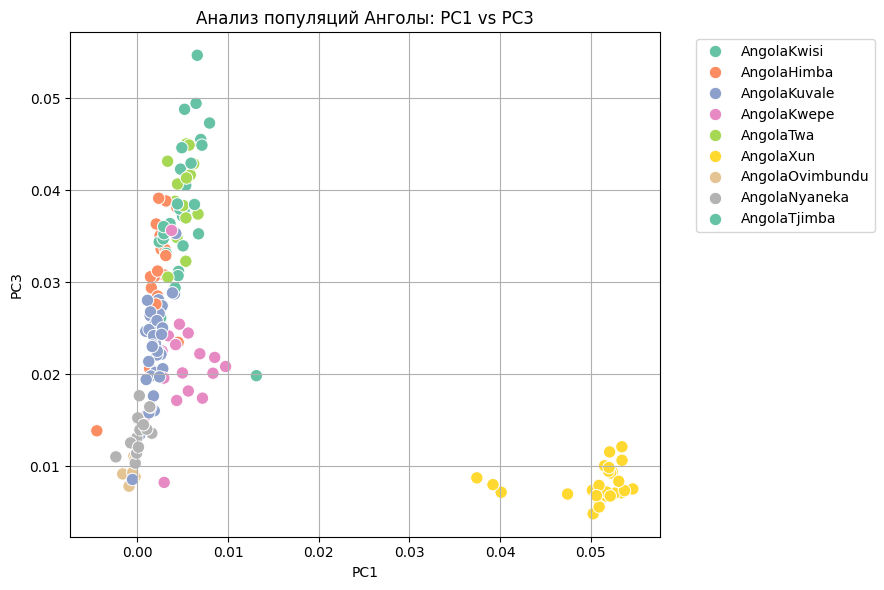

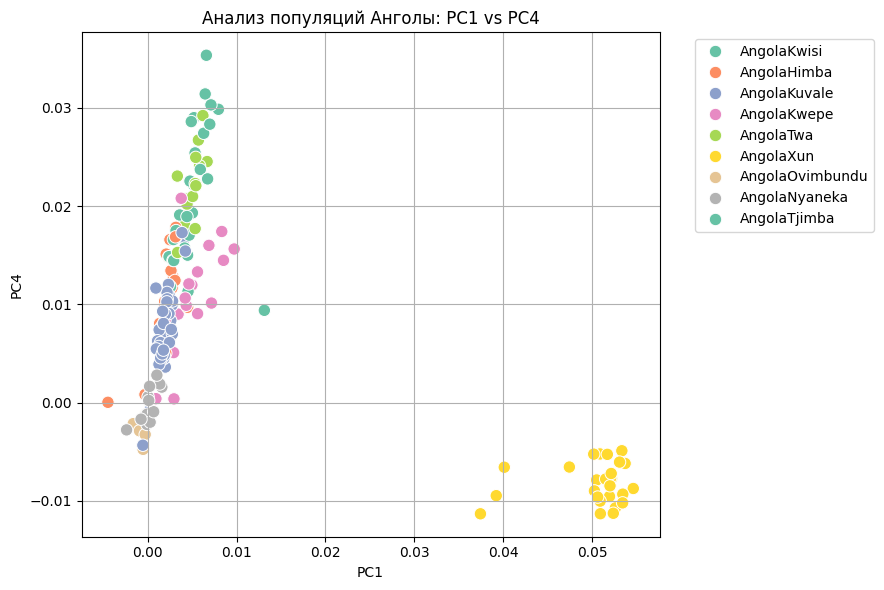

In [43]:
# Отфильтруем популяции, относящиеся к Анголе
angola_df = eigenvec[eigenvec["Population"].str.contains("Angola", na=False)]

# Построим графики PC1 против PC2, PC3, PC4
for pc_y in ["PC2", "PC3", "PC4"]:
    plt.figure(figsize=(9, 6))
    sns.scatterplot(data=angola_df, x="PC1", y=pc_y, hue="Population", palette="Set2", s=80)
    plt.title(f"Анализ популяций Анголы: PC1 vs {pc_y}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Вывод: 
Группа AngolaXun демонстрирует отчётливое отделение от остальных популяций на диаграммах рассеяния PC1 против других компонент (PC2–PC4). Это может свидетельствовать о наличии значительных генетических отличий или уникальной демографической истории данной группы.

## Интерактивные графики PCA в Plotly

In [44]:
import plotly.express as px

fig = px.scatter(
    eigenvec,
    x="PC1", y="PC2",
    color="Population",
    hover_data=["IID", "Latitude", "Longitude"],
    title="PCA: PC1 vs PC2 (interactive)",
    width=900, height=600
)
fig.show()

In [47]:
fig = px.scatter(
    eigenvec,
    x="PC1", y="PC3",
    color="Population",
    hover_data=["IID", "Latitude", "Longitude"],
    title="PCA: PC1 vs PC3 (interactive)",
    width=900, height=600
)
fig.show()

## Интерактивная визуализация, где можно переключаться между разными парами компонент

In [49]:
import plotly.graph_objects as go

# Список пар компонент
pc_pairs = [("PC1", "PC2"), ("PC1", "PC3"), ("PC2", "PC3"), ("PC3", "PC4")]

# Цвета популяций — закодируем вручную
populations = eigenvec["Population"].unique()
color_map = {pop: i for i, pop in enumerate(populations)}
colors = eigenvec["Population"].map(color_map)

# Готовим следы (traces) для каждой пары компонент
traces = []
visibility = []

for i, (pc_x, pc_y) in enumerate(pc_pairs):
    trace = go.Scatter(
        x=eigenvec[pc_x],
        y=eigenvec[pc_y],
        mode="markers",
        marker=dict(color=colors, colorscale="Viridis", showscale=False),
        text=eigenvec["Population"],
        name=f"{pc_x} vs {pc_y}",
        visible=(i == 0)  # Только первая пара видна по умолчанию
    )
    traces.append(trace)
    visibility.append([j == i for j in range(len(pc_pairs))])

# Кнопки переключения
buttons = [
    dict(label=f"{pc_x} vs {pc_y}",
         method="update",
         args=[{"visible": vis},
               {"title": f"PCA: {pc_x} vs {pc_y}"}])
    for (pc_x, pc_y), vis in zip(pc_pairs, visibility)
]

# Финальный график
fig = go.Figure(data=traces)
fig.update_layout(
    title="PCA: PC1 vs PC2",
    updatemenus=[dict(
        type="dropdown",
        buttons=buttons,
        direction="down",
        x=1.1,
        y=1.15
    )],
    xaxis_title="PC1",
    yaxis_title="PC2",
    width=900,
    height=600
)
fig.show()

In [45]:
!pip install folium

## Географическая карта популяций (Folium) - просто посмотреть популяции на карте

In [46]:
import folium
from folium.plugins import MarkerCluster

# Создаём базовую карту
m = folium.Map(location=[eigenvec["Latitude"].mean(), eigenvec["Longitude"].mean()], zoom_start=5)

# Кластер точек
marker_cluster = MarkerCluster().add_to(m)

# Добавим точки по популяциям (по одной)
for pop_name, group in eigenvec.groupby("Population"):
    lat = group["Latitude"].iloc[0]
    lon = group["Longitude"].iloc[0]
    folium.Marker(
        location=[lat, lon],
        popup=f"{pop_name} ({len(group)} samples)",
        tooltip=pop_name,
    ).add_to(marker_cluster)

m

## Стандартизация перед кластеризацией

In [52]:
from sklearn.preprocessing import StandardScaler

X = eigenvec[[f"PC{i}" for i in range(1, 11)]].copy()
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Начнём с KMeans

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [53]:
k_range = range(2, 31)
metrics = {
    "silhouette": [],
    "davies_bouldin": [],
    "calinski_harabasz": []
}

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    metrics["silhouette"].append(silhouette_score(X_scaled, labels))
    metrics["davies_bouldin"].append(davies_bouldin_score(X_scaled, labels))
    metrics["calinski_harabasz"].append(calinski_harabasz_score(X_scaled, labels))

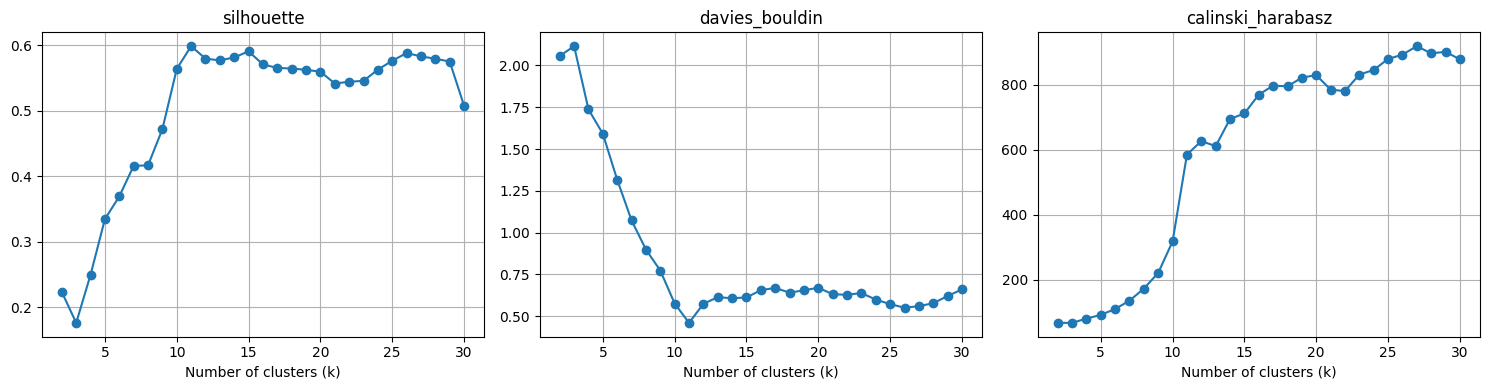

In [54]:
# Визуализируем метрики
plt.figure(figsize=(15, 4))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    plt.plot(k_range, metrics[metric], marker='o')
    plt.title(metric)
    plt.xlabel("Number of clusters (k)")
    plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
best_k = k_range[np.argmax(metrics["silhouette"])]
print(f"Лучшее k по силуэту: {best_k}")

kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)
eigenvec["Cluster_KMeans"] = labels

Лучшее k по силуэту: 11


In [56]:
# Сохраняем метрики KMeans
kmeans_metrics = {
    "Model": "KMeans",
    "n_clusters": best_k,
    "Silhouette": silhouette_score(X_scaled, labels),
    "Davies-Bouldin": davies_bouldin_score(X_scaled, labels),
    "Calinski-Harabasz": calinski_harabasz_score(X_scaled, labels)
}

# Преобразуем в DataFrame
df_kmeans_metrics = pd.DataFrame([kmeans_metrics])
df_kmeans_metrics

Model  n_clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz
0  KMeans          11    0.598536        0.460442         585.275618

In [57]:
# Обучим все три снижения размерности
pca_emb = PCA(n_components=2).fit_transform(X_scaled)
umap_emb = UMAP(n_components=2, random_state=42).fit_transform(X_scaled)
tsne_emb = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

# Соберём в один фрейм
viz_df = pd.DataFrame({
    "PCA1": pca_emb[:, 0], "PCA2": pca_emb[:, 1],
    "UMAP1": umap_emb[:, 0], "UMAP2": umap_emb[:, 1],
    "TSNE1": tsne_emb[:, 0], "TSNE2": tsne_emb[:, 1],
    "Cluster": labels,
    "Population": eigenvec["Population"]
})

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



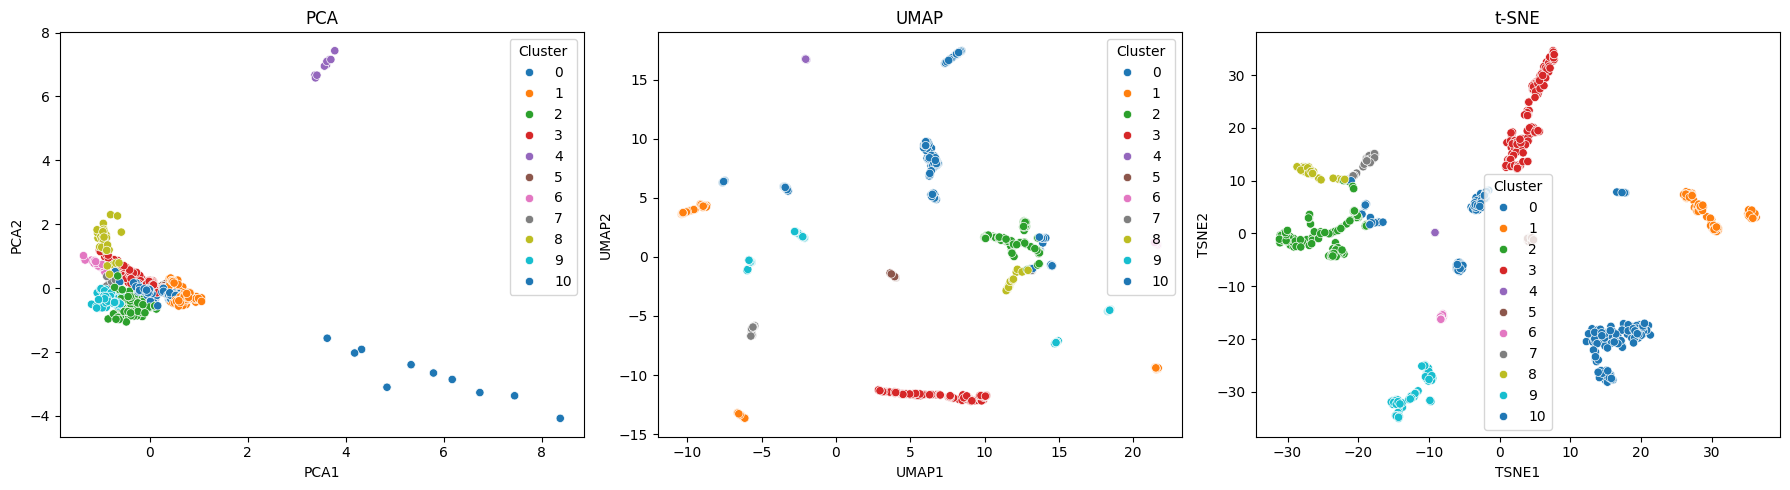

In [58]:
# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=viz_df, x="PCA1", y="PCA2", hue="Cluster", ax=axes[0], palette="tab10")
axes[0].set_title("PCA")

sns.scatterplot(data=viz_df, x="UMAP1", y="UMAP2", hue="Cluster", ax=axes[1], palette="tab10")
axes[1].set_title("UMAP")

sns.scatterplot(data=viz_df, x="TSNE1", y="TSNE2", hue="Cluster", ax=axes[2], palette="tab10")
axes[2].set_title("t-SNE")

plt.tight_layout()
plt.show()

Population      AfarWGA  AinToutaWGA  Algerian  AngolaHimba  AngolaKuvale  \
Cluster_KMeans                                                              
0                     0            0         0            2             5   
1                     0            0         5            0             0   
2                     0            0         0            0             0   
3                     0            0         0           20            36   
4                     0            0         0            0             0   
5                     0            0         0            0             0   
6                     0            0         0            0             0   
7                     0            0         0            0             0   
8                     0            0         0            0             0   
9                     5            0         0            0             0   
10                    0            3         0            0             0   

Population      AngolaKwepe  AngolaKwisi  AngolaNyaneka  AngolaOvimbundu  \
Cluster_KMeans                                                             
0                         2            0             14                6   
1                         0            0              0                0   
2                         0            0              0                0   
3                        17           16              0                0   
4                         0            0              0                0   
5                         0            0              0                0   
6                         0            0              0                0   
7                         0            0              0                0   
8                         0            0              0                0   
9                         0            0              0                0   
10                        0            0              0                0   

Population      AngolaTjimba  ...  Somali  TaaEast  TaaNorth  TaaWest  Tshwa  \
Cluster_KMeans                ...                                              
0                          0  ...       0        0         0        0      0   
1                          0  ...       0        0         0        0      0   
2                          0  ...       0        6         9       14      4   
3                         12  ...       0        0         0        0      0   
4                          0  ...       0        0         0        0      0   
5                          0  ...       0        0         0        0      0   
6                          0  ...       0        0         0        0      0   
7                          0  ...       0        0         0        0      0   
8                          0  ...       0        0         0        0      0   
9                          0  ...      13        0         0        0      0   
10                         0  ...       0        0         0        0      0   

Population      Tswana  Tunisian  Wambo  Xuun  Yoruba  
Cluster_KMeans                                         
0                    4         0      5     3      70  
1                    0         8      0     0       0  
2                    1         0      0     2       0  
3                    0         0      0     0       0  
4                    0         0      0     0       0  
5                    0         0      0     0       0  
6                    0         0      0     0       0  
7                    0         0      0     3       0  
8                    0         0      0     4       0  
9                    0         0      0     0       0  
10                   0         0      0     0       0  

[11 rows x 64 columns]

<ipython-input-59-bc5f46a947ee>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




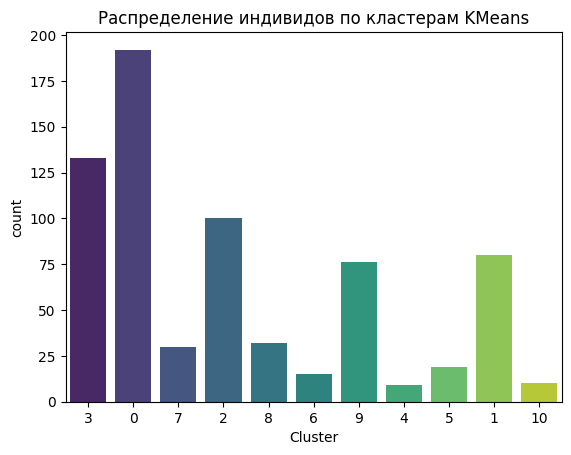

In [59]:
crosstab = pd.crosstab(eigenvec["Cluster_KMeans"], eigenvec["Population"])
display(crosstab)

# Распределение по кластерам
viz_df['Cluster'] = viz_df['Cluster'].astype(str)
sns.countplot(data=viz_df, x='Cluster', palette='viridis')
plt.title("Распределение индивидов по кластерам KMeans")
plt.show()

In [60]:
from sklearn.manifold import TSNE
import plotly.graph_objects as go

# 3D t-SNE
tsne_3d = TSNE(n_components=3, random_state=42).fit_transform(X_scaled)
df_3d = pd.DataFrame(tsne_3d, columns=["x", "y", "z"])

# Передаём кластеры как числа, а не строки
df_3d["Cluster"] = eigenvec["Cluster_KMeans"].astype(int)

# График
fig = go.Figure(data=go.Scatter3d(
    x=df_3d['x'], y=df_3d['y'], z=df_3d['z'],
    mode='markers',
    marker=dict(
        size=4,
        color=df_3d['Cluster'],  # <- теперь это числа
        colorscale='Viridis',
        opacity=0.8,
        showscale=True
    )
))

fig.update_layout(title="KMeans Clusters in 3D t-SNE", margin=dict(l=0, r=0, b=0, t=30))
fig.show()

## Теперь иерархическая кластеризация

In [61]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

k_range = range(2, 31)
metrics_h = {
    "silhouette": [],
    "davies_bouldin": [],
    "calinski_harabasz": []
}

for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_scaled)
    metrics_h["silhouette"].append(silhouette_score(X_scaled, labels))
    metrics_h["davies_bouldin"].append(davies_bouldin_score(X_scaled, labels))
    metrics_h["calinski_harabasz"].append(calinski_harabasz_score(X_scaled, labels))

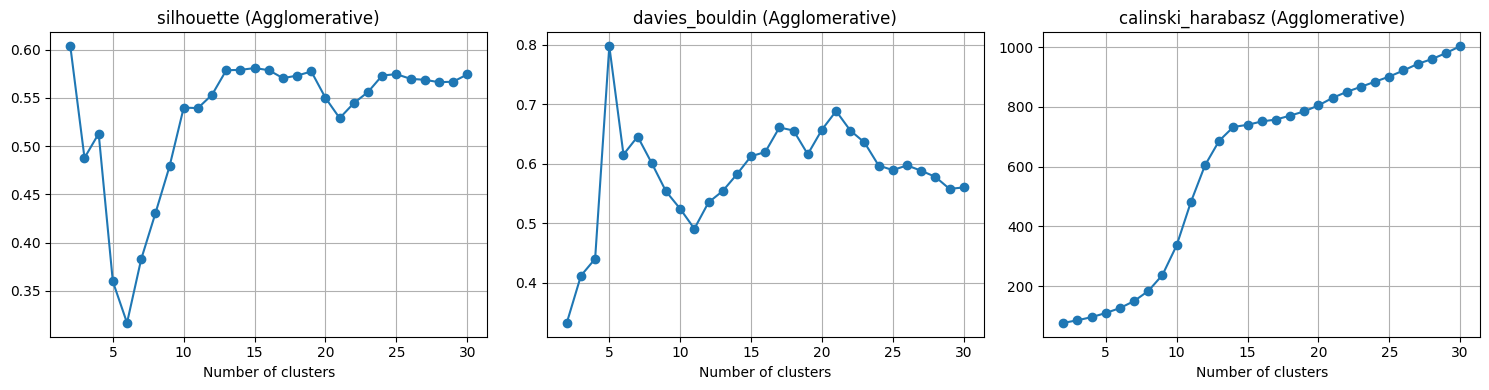

In [62]:
# Визуализируем метрики
plt.figure(figsize=(15, 4))
for i, metric in enumerate(metrics_h):
    plt.subplot(1, 3, i+1)
    plt.plot(k_range, metrics_h[metric], marker='o')
    plt.title(f"{metric} (Agglomerative)")
    plt.xlabel("Number of clusters")
    plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
best_k_h = k_range[np.argmax(metrics_h["silhouette"])]
print(f"Лучшее количество кластеров по силуэту: {best_k_h}")

agglo_model = AgglomerativeClustering(n_clusters=best_k_h)
eigenvec["Cluster_Agglo"] = agglo_model.fit_predict(X_scaled)

Лучшее количество кластеров по силуэту: 2


In [64]:
agglo_labels = eigenvec["Cluster_Agglo"]

# Сохраняем метрики AgglomerativeClustering
agglo_metrics = {
    "Model": "AgglomerativeClustering",
    "n_clusters": best_k_h,
    "Silhouette": silhouette_score(X_scaled, agglo_labels),
    "Davies-Bouldin": davies_bouldin_score(X_scaled, agglo_labels),
    "Calinski-Harabasz": calinski_harabasz_score(X_scaled, agglo_labels)
}

# Преобразуем в DataFrame
df_agglo_metrics = pd.DataFrame([agglo_metrics])
df_agglo_metrics

Model  n_clusters  Silhouette  Davies-Bouldin  \
0  AgglomerativeClustering           2    0.603522        0.332889   

   Calinski-Harabasz  
0          76.403642

In [65]:
# Можно переиспользовать предыдущие эмбеддинги или пересчитать:
pca_emb = PCA(n_components=2).fit_transform(X_scaled)
umap_emb = UMAP(n_components=2, random_state=42).fit_transform(X_scaled)
tsne_emb = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

viz_agglo = pd.DataFrame({
    "PCA1": pca_emb[:, 0], "PCA2": pca_emb[:, 1],
    "UMAP1": umap_emb[:, 0], "UMAP2": umap_emb[:, 1],
    "TSNE1": tsne_emb[:, 0], "TSNE2": tsne_emb[:, 1],
    "Cluster": eigenvec["Cluster_Agglo"].astype(str),
    "Population": eigenvec["Population"]
})

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



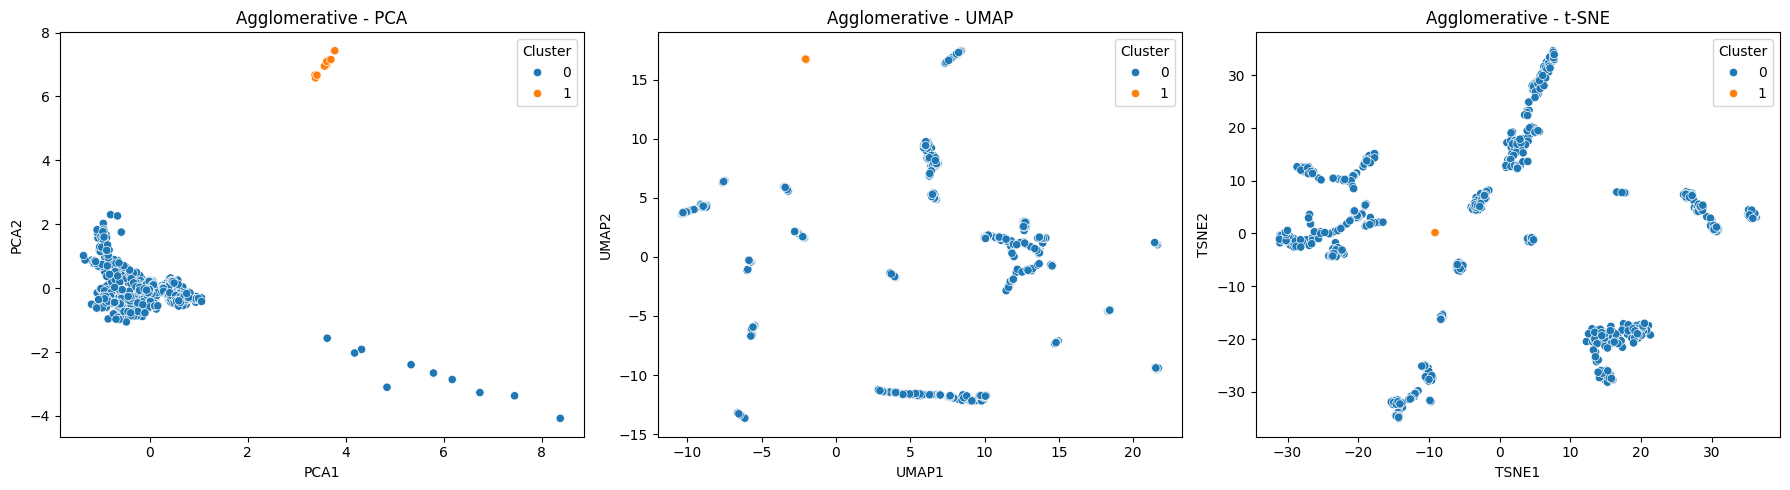

In [66]:
# Отображение
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=viz_agglo, x="PCA1", y="PCA2", hue="Cluster", ax=axes[0], palette="tab10")
axes[0].set_title("Agglomerative - PCA")

sns.scatterplot(data=viz_agglo, x="UMAP1", y="UMAP2", hue="Cluster", ax=axes[1], palette="tab10")
axes[1].set_title("Agglomerative - UMAP")

sns.scatterplot(data=viz_agglo, x="TSNE1", y="TSNE2", hue="Cluster", ax=axes[2], palette="tab10")
axes[2].set_title("Agglomerative - t-SNE")

plt.tight_layout()
plt.show()

Population     AfarWGA  AinToutaWGA  Algerian  AngolaHimba  AngolaKuvale  \
Cluster_Agglo                                                              
0                    5            3         5           22            41   
1                    0            0         0            0             0   

Population     AngolaKwepe  AngolaKwisi  AngolaNyaneka  AngolaOvimbundu  \
Cluster_Agglo                                                             
0                       19           16             14                6   
1                        0            0              0                0   

Population     AngolaTjimba  ...  Somali  TaaEast  TaaNorth  TaaWest  Tshwa  \
Cluster_Agglo                ...                                              
0                        12  ...      13        6         9       14      4   
1                         0  ...       0        0         0        0      0   

Population     Tswana  Tunisian  Wambo  Xuun  Yoruba  
Cluster_Agglo                                         
0                   5         8      5    12      70  
1                   0         0      0     0       0  

[2 rows x 64 columns]

<ipython-input-67-4a939c240496>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




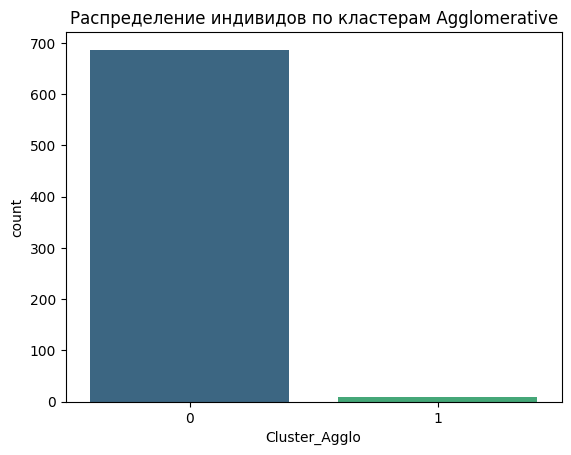

In [67]:
# Кросстаб популяций и кластеров
crosstab_agglo = pd.crosstab(eigenvec["Cluster_Agglo"], eigenvec["Population"])
display(crosstab_agglo)

# Распределение
sns.countplot(data=eigenvec, x="Cluster_Agglo", palette="viridis")
plt.title("Распределение индивидов по кластерам Agglomerative")
plt.show()

In [68]:
tsne_3d = TSNE(n_components=3, random_state=42).fit_transform(X_scaled)
df_3d_agglo = pd.DataFrame(tsne_3d, columns=["x", "y", "z"])
df_3d_agglo["Cluster"] = eigenvec["Cluster_Agglo"].astype(int)

fig = go.Figure(data=go.Scatter3d(
    x=df_3d_agglo['x'], y=df_3d_agglo['y'], z=df_3d_agglo['z'],
    mode='markers',
    marker=dict(
        size=4,
        color=df_3d_agglo['Cluster'],
        colorscale='Viridis',
        opacity=0.8,
        showscale=True
    )
))

fig.update_layout(title="Agglomerative Clusters in 3D t-SNE", margin=dict(l=0, r=0, b=0, t=30))
fig.show()

## DBSCAN

In [69]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [70]:
eps_range = np.arange(0.2, 1.2, 0.05)
min_samples_range = range(3, 20)

results = []

for eps in tqdm(eps_range, desc="Eps"):
    for min_samples in min_samples_range:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X_scaled)

        # Пропускаем если 1 кластер или только шум
        if len(set(labels)) < 2 or all(l == -1 for l in labels):
            continue

        silhouette = silhouette_score(X_scaled, labels)
        davies = davies_bouldin_score(X_scaled, labels)
        calinski = calinski_harabasz_score(X_scaled, labels)

        results.append({
            "eps": eps,
            "min_samples": min_samples,
            "silhouette": silhouette,
            "davies_bouldin": davies,
            "calinski_harabasz": calinski
        })

df_scores = pd.DataFrame(results)

Eps: 100%|██████████| 20/20 [00:27<00:00,  1.37s/it]


## Визуализация метрик DBSCAN по сетке параметров (eps × min_samples)

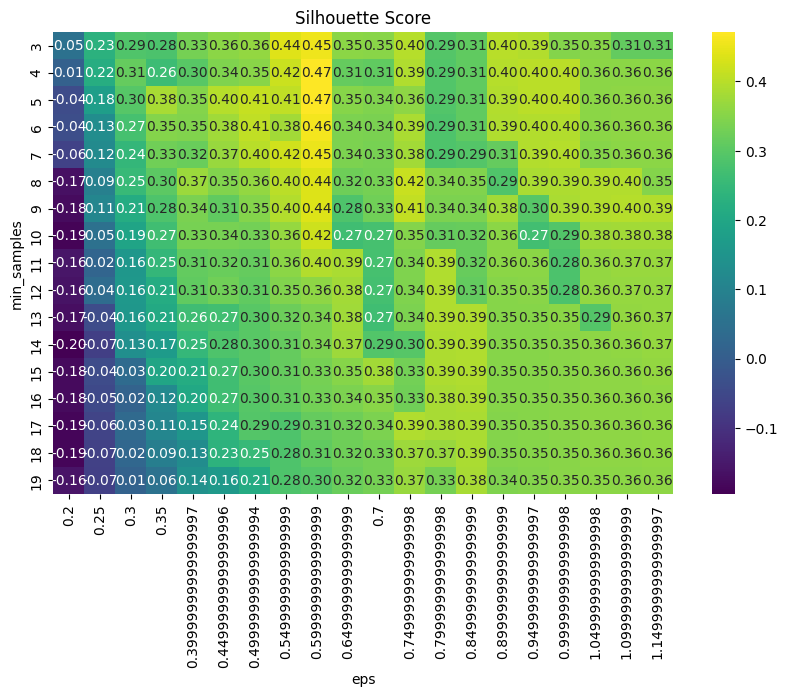

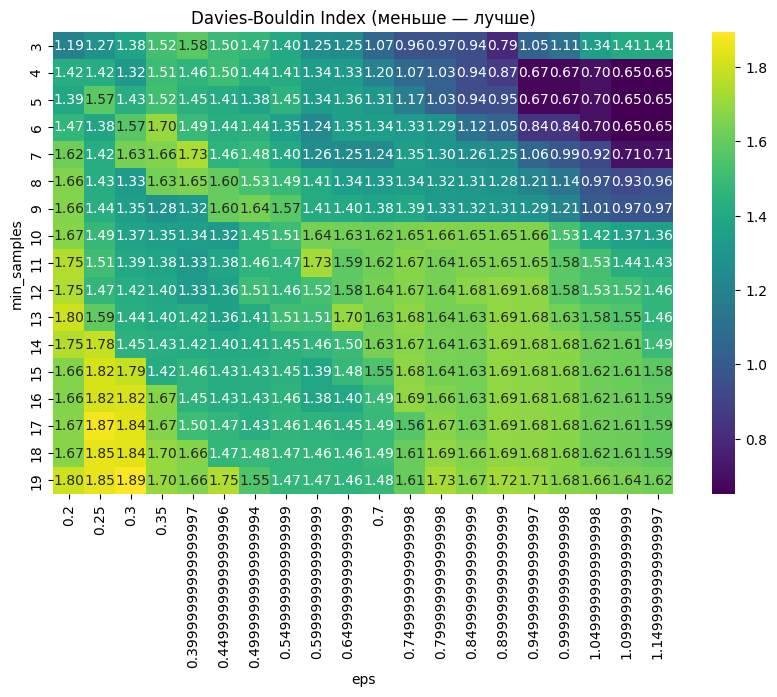

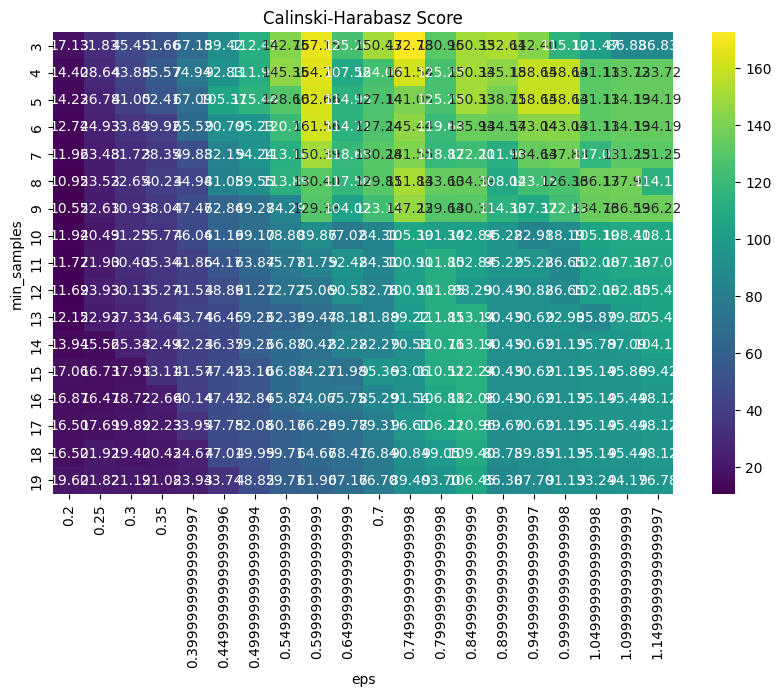

In [71]:
pivot = df_scores.pivot(index="min_samples", columns="eps", values="silhouette")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="viridis", annot=True, fmt=".2f")
plt.title("Silhouette Score")
plt.show()

pivot = df_scores.pivot(index="min_samples", columns="eps", values="davies_bouldin")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="viridis", annot=True, fmt=".2f")
plt.title("Davies-Bouldin Index (меньше — лучше)")
plt.show()

pivot = df_scores.pivot(index="min_samples", columns="eps", values="calinski_harabasz")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="viridis", annot=True, fmt=".2f")
plt.title("Calinski-Harabasz Score")
plt.show()

In [72]:
best_row = df_scores.loc[df_scores["silhouette"].idxmax()]
print("Лучшие параметры:", best_row)

dbscan = DBSCAN(eps=best_row["eps"], min_samples=int(best_row["min_samples"]))
eigenvec["Cluster_DBSCAN"] = dbscan.fit_predict(X_scaled)

Лучшие параметры: eps                    0.600000
min_samples            4.000000
silhouette             0.471474
davies_bouldin         1.340753
calinski_harabasz    164.703609
Name: 137, dtype: float64


In [73]:
# Убедимся, что шум не составляет 100% данных
dbscan_labels = eigenvec["Cluster_DBSCAN"]
n_clusters_db = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels.values else 0)

if n_clusters_db > 1:
    dbscan_metrics = {
        "Model": "DBSCAN",
        "n_clusters": n_clusters_db,
        "Silhouette": silhouette_score(X_scaled, dbscan_labels),
        "Davies-Bouldin": davies_bouldin_score(X_scaled, dbscan_labels),
        "Calinski-Harabasz": calinski_harabasz_score(X_scaled, dbscan_labels)
    }
else:
    dbscan_metrics = {
        "Model": "DBSCAN",
        "n_clusters": n_clusters_db,
        "Silhouette": None,
        "Davies-Bouldin": None,
        "Calinski-Harabasz": None
    }

# Преобразуем в DataFrame
df_dbscan_metrics = pd.DataFrame([dbscan_metrics])
df_dbscan_metrics

Model  n_clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz
0  DBSCAN          16    0.471474        1.340753         164.703609

In [74]:
# Снижение размерности
pca_emb = PCA(n_components=2).fit_transform(X_scaled)
umap_emb = UMAP(n_components=2, random_state=42).fit_transform(X_scaled)
tsne_emb = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

viz_dbscan = pd.DataFrame({
    "PCA1": pca_emb[:, 0], "PCA2": pca_emb[:, 1],
    "UMAP1": umap_emb[:, 0], "UMAP2": umap_emb[:, 1],
    "TSNE1": tsne_emb[:, 0], "TSNE2": tsne_emb[:, 1],
    "Cluster": eigenvec["Cluster_DBSCAN"].astype(str),
    "Population": eigenvec["Population"]
})

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



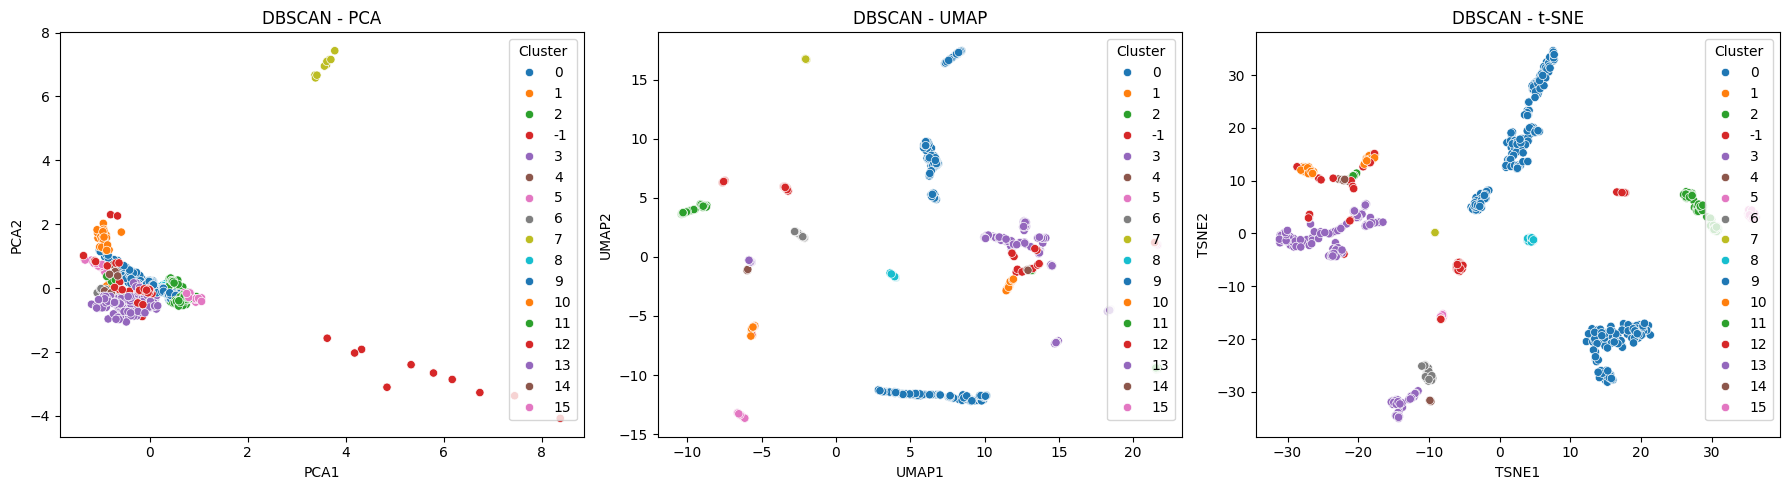

In [75]:
# Графики
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=viz_dbscan, x="PCA1", y="PCA2", hue="Cluster", ax=axes[0], palette="tab10")
axes[0].set_title("DBSCAN - PCA")

sns.scatterplot(data=viz_dbscan, x="UMAP1", y="UMAP2", hue="Cluster", ax=axes[1], palette="tab10")
axes[1].set_title("DBSCAN - UMAP")

sns.scatterplot(data=viz_dbscan, x="TSNE1", y="TSNE2", hue="Cluster", ax=axes[2], palette="tab10")
axes[2].set_title("DBSCAN - t-SNE")

plt.tight_layout()
plt.show()

In [76]:
pd.crosstab(eigenvec["Cluster_DBSCAN"], eigenvec["Population"])

Population      AfarWGA  AinToutaWGA  Algerian  AngolaHimba  AngolaKuvale  \
Cluster_DBSCAN                                                              
-1                    0            3         0            0             0   
 0                    0            0         0           22            41   
 1                    0            0         0            0             0   
 2                    0            0         0            0             0   
 3                    0            0         0            0             0   
 4                    0            0         0            0             0   
 5                    0            0         0            0             0   
 6                    0            0         0            0             0   
 7                    0            0         0            0             0   
 8                    0            0         0            0             0   
 9                    0            0         0            0             0   
 10                   0            0         0            0             0   
 11                   0            0         5            0             0   
 12                   0            0         0            0             0   
 13                   5            0         0            0             0   
 14                   0            0         0            0             0   
 15                   0            0         0            0             0   

Population      AngolaKwepe  AngolaKwisi  AngolaNyaneka  AngolaOvimbundu  \
Cluster_DBSCAN                                                             
-1                        0            0              0                0   
 0                       19           16             14                6   
 1                        0            0              0                0   
 2                        0            0              0                0   
 3                        0            0              0                0   
 4                        0            0              0                0   
 5                        0            0              0                0   
 6                        0            0              0                0   
 7                        0            0              0                0   
 8                        0            0              0                0   
 9                        0            0              0                0   
 10                       0            0              0                0   
 11                       0            0              0                0   
 12                       0            0              0                0   
 13                       0            0              0                0   
 14                       0            0              0                0   
 15                       0            0              0                0   

Population      AngolaTjimba  ...  Somali  TaaEast  TaaNorth  TaaWest  Tshwa  \
Cluster_DBSCAN                ...                                              
-1                         0  ...       0        0         0        0      0   
 0                        12  ...       0        0         0        0      0   
 1                         0  ...       0        0         0        0      0   
 2                         0  ...       0        0         0        0      0   
 3                         0  ...       0        6         9       14      4   
 4                         0  ...       0        0         0        0      0   
 5                         0  ...       0        0         0        0      0   
 6                         0  ...       0        0         0        0      0   
 7                         0  ...       0        0         0        0      0   
 8                         0  ...       0        0         0        0      0   
 9                         0  ...       0        0         0        0      0   
 10                        0  ...       0        0 

<ipython-input-77-2f90aeb4d291>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




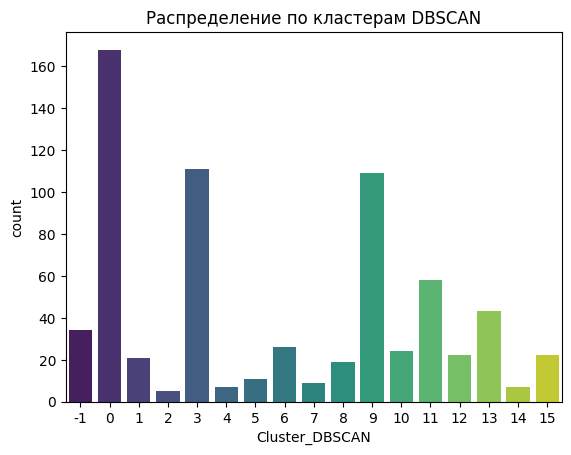

In [77]:
sns.countplot(data=eigenvec, x="Cluster_DBSCAN", palette="viridis")
plt.title("Распределение по кластерам DBSCAN")
plt.show()

In [78]:
tsne_3d = TSNE(n_components=3, random_state=42).fit_transform(X_scaled)
df_3d_db = pd.DataFrame(tsne_3d, columns=["x", "y", "z"])
df_3d_db["Cluster"] = eigenvec["Cluster_DBSCAN"].astype(int)

fig = go.Figure(data=go.Scatter3d(
    x=df_3d_db['x'], y=df_3d_db['y'], z=df_3d_db['z'],
    mode='markers',
    marker=dict(
        size=4,
        color=df_3d_db['Cluster'],
        colorscale='Viridis',
        opacity=0.8,
        showscale=True
    )
))

fig.update_layout(title="DBSCAN Clusters in 3D t-SNE", margin=dict(l=0, r=0, b=0, t=30))
fig.show()

In [79]:
df_all_metrics = pd.concat([
    df_kmeans_metrics,
    df_agglo_metrics,
    df_dbscan_metrics
], ignore_index=True)

# Сохраняем
df_all_metrics.to_csv("cluster_metrics_before_hdbscan.csv", index=False)
print("Метрики до HDBSCAN сохранены")

Метрики до HDBSCAN сохранены


## HDBSCAN

In [80]:
!pip install hdbscan

In [81]:
import hdbscan
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [82]:
min_cluster_sizes = range(5, 31)
min_samples_range = range(5, 31)

results_hdb = []

for min_cluster_size in tqdm(min_cluster_sizes, desc="Cluster Size"):
    for min_samples in min_samples_range:
        try:
            model = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
            labels = model.fit_predict(X_scaled)
            if len(set(labels)) < 2 or all(l == -1 for l in labels):
                continue
            sil = silhouette_score(X_scaled, labels)
            db = davies_bouldin_score(X_scaled, labels)
            ch = calinski_harabasz_score(X_scaled, labels)

            results_hdb.append({
                "min_cluster_size": min_cluster_size,
                "min_samples": min_samples,
                "silhouette": sil,
                "davies_bouldin": db,
                "calinski_harabasz": ch
            })
        except:
            continue

df_hdb = pd.DataFrame(results_hdb)

Cluster Size: 100%|██████████| 26/26 [01:53<00:00,  4.36s/it]


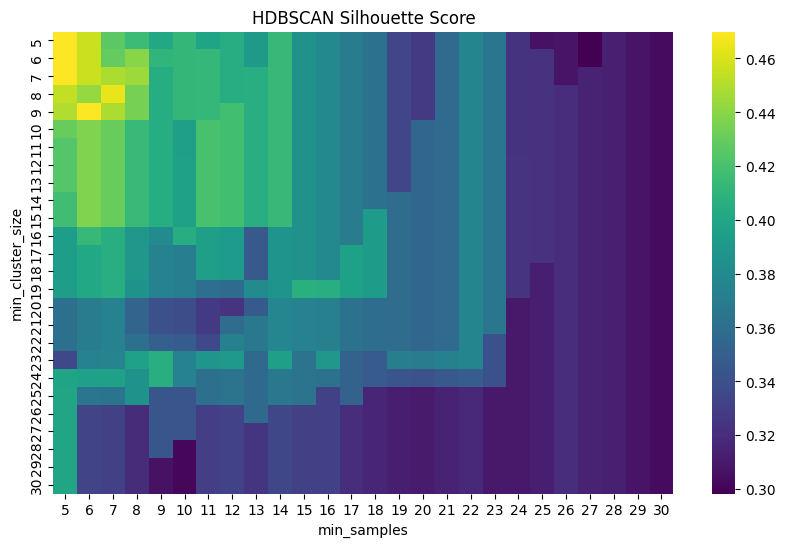

In [83]:
pivot = df_hdb.pivot(index="min_cluster_size", columns="min_samples", values="silhouette")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="viridis", annot=False)
plt.title("HDBSCAN Silhouette Score")
plt.show()

In [84]:
best_hdb = df_hdb.loc[df_hdb["silhouette"].idxmax()]
print("Лучшие параметры:", best_hdb)

model = hdbscan.HDBSCAN(
    min_cluster_size=int(best_hdb["min_cluster_size"]),
    min_samples=int(best_hdb["min_samples"])
)

eigenvec["Cluster_HDBSCAN"] = model.fit_predict(X_scaled)

Лучшие параметры: min_cluster_size       9.000000
min_samples            6.000000
silhouette             0.469988
davies_bouldin         1.131817
calinski_harabasz    259.266570
Name: 105, dtype: float64


In [86]:
pca_emb = PCA(n_components=2).fit_transform(X_scaled)
umap_emb = UMAP(n_components=2, random_state=42).fit_transform(X_scaled)
tsne_emb = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

viz_hdb = pd.DataFrame({
    "PCA1": pca_emb[:, 0], "PCA2": pca_emb[:, 1],
    "UMAP1": umap_emb[:, 0], "UMAP2": umap_emb[:, 1],
    "TSNE1": tsne_emb[:, 0], "TSNE2": tsne_emb[:, 1],
    "Cluster": eigenvec["Cluster_HDBSCAN"].astype(str),
    "Population": eigenvec["Population"]
})

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



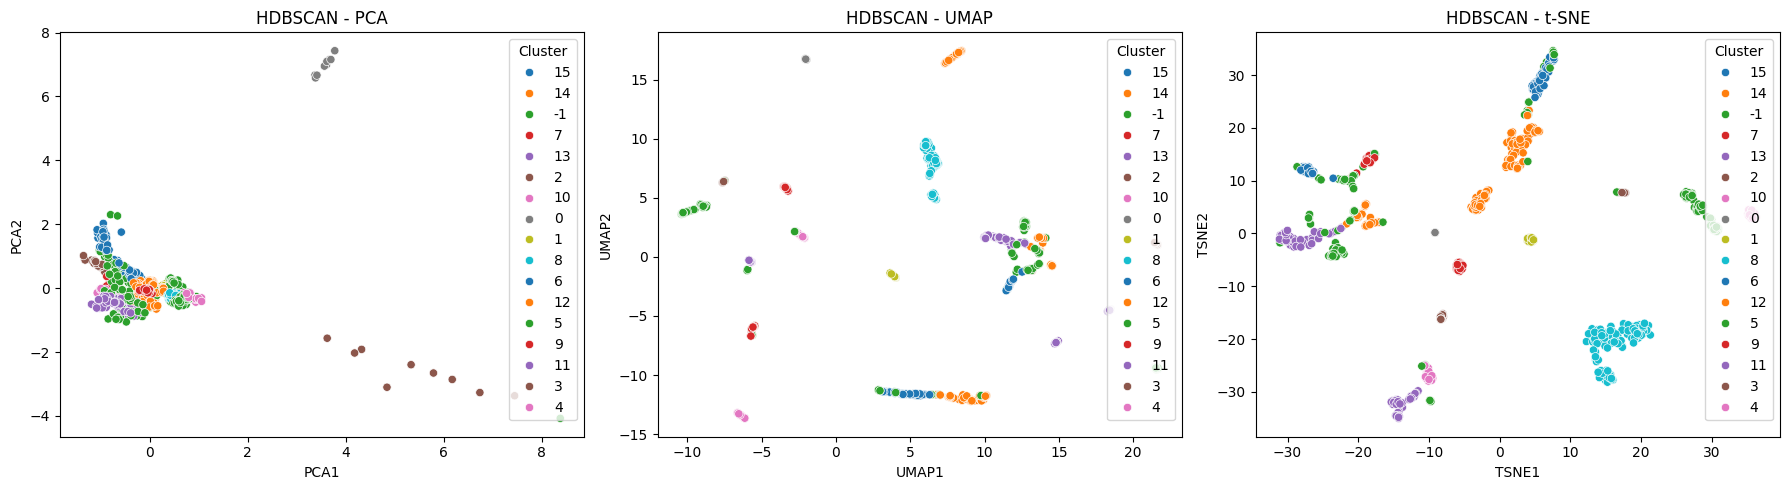

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=viz_hdb, x="PCA1", y="PCA2", hue="Cluster", ax=axes[0], palette="tab10")
axes[0].set_title("HDBSCAN - PCA")

sns.scatterplot(data=viz_hdb, x="UMAP1", y="UMAP2", hue="Cluster", ax=axes[1], palette="tab10")
axes[1].set_title("HDBSCAN - UMAP")

sns.scatterplot(data=viz_hdb, x="TSNE1", y="TSNE2", hue="Cluster", ax=axes[2], palette="tab10")
axes[2].set_title("HDBSCAN - t-SNE")

plt.tight_layout()
plt.show()

In [88]:
pd.crosstab(eigenvec["Cluster_HDBSCAN"], eigenvec["Population"])

Population       AfarWGA  AinToutaWGA  Algerian  AngolaHimba  AngolaKuvale  \
Cluster_HDBSCAN                                                              
-1                     0            0         0            0             0   
 0                     0            0         0            0             0   
 1                     0            0         0            0             0   
 2                     0            0         0            0             0   
 3                     0            3         0            0             0   
 4                     0            0         0            0             0   
 5                     0            0         5            0             0   
 6                     0            0         0            0             0   
 7                     0            0         0            0             0   
 8                     0            0         0            0             0   
 9                     0            0         0            0             0   
 10                    0            0         0            0             0   
 11                    5            0         0            0             0   
 12                    0            0         0            0             0   
 13                    0            0         0            0             0   
 14                    0            0         0           12            37   
 15                    0            0         0           10             4   

Population       AngolaKwepe  AngolaKwisi  AngolaNyaneka  AngolaOvimbundu  \
Cluster_HDBSCAN                                                             
-1                         7            7              0                0   
 0                         0            0              0                0   
 1                         0            0              0                0   
 2                         0            0              0                0   
 3                         0            0              0                0   
 4                         0            0              0                0   
 5                         0            0              0                0   
 6                         0            0              0                0   
 7                         0            0              0                0   
 8                         0            0              0                0   
 9                         0            0              0                0   
 10                        0            0              0                0   
 11                        0            0              0                0   
 12                        0            0              0                0   
 13                        0            0              0                0   
 14                       10            0             14                6   
 15                        2            9              0                0   

Population       AngolaTjimba  ...  Somali  TaaEast  TaaNorth  TaaWest  Tshwa  \
Cluster_HDBSCAN                ...                                              
-1                          1  ...       0        0         0        2      1   
 0                          0  ...       0        0         0        0      0   
 1                          0  ...       0        0         0        0      0   
 2                          0  ...       0        0         0        0      0   
 3                          0  ...       0        0         0        0      0   
 4                          0  ...       0        0         0        0      0   
 5                          0  ...       0        0         0        0      0   
 6                          0  ...       0        0         0        0      0   
 7                          0  ...       0        0         0        0      0   
 8                          0  ...       0        0         0        0      0   
 9                          0  ...       0        0         0        0      0   


<ipython-input-89-559e33f71d0b>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




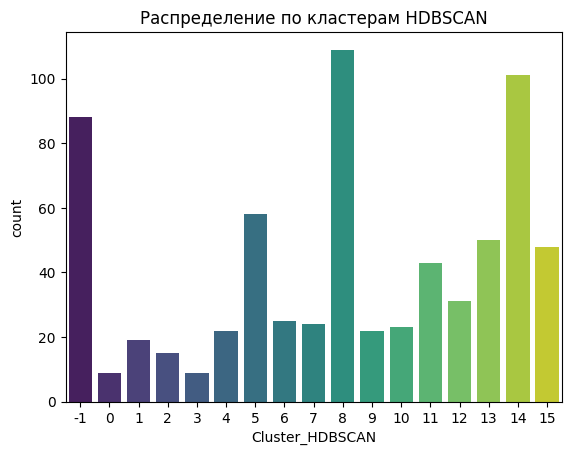

In [89]:
sns.countplot(data=eigenvec, x="Cluster_HDBSCAN", palette="viridis")
plt.title("Распределение по кластерам HDBSCAN")
plt.show()

In [90]:
tsne_3d = TSNE(n_components=3, random_state=42).fit_transform(X_scaled)
df_3d_hdb = pd.DataFrame(tsne_3d, columns=["x", "y", "z"])
df_3d_hdb["Cluster"] = eigenvec["Cluster_HDBSCAN"].astype(int)

fig = go.Figure(data=go.Scatter3d(
    x=df_3d_hdb['x'], y=df_3d_hdb['y'], z=df_3d_hdb['z'],
    mode='markers',
    marker=dict(
        size=4,
        color=df_3d_hdb['Cluster'],
        colorscale='Viridis',
        opacity=0.8,
        showscale=True
    )
))

fig.update_layout(title="HDBSCAN Clusters in 3D t-SNE", margin=dict(l=0, r=0, b=0, t=30))
fig.show()

In [91]:
# Сбор метрик HDBSCAN
hdbscan_metrics = {
    "Model": "HDBSCAN",
    "n_clusters": len(set(model.labels_)) - (1 if -1 in model.labels_ else 0),
    "Silhouette": silhouette_score(X_scaled, model.labels_),
    "Davies-Bouldin": davies_bouldin_score(X_scaled, model.labels_),
    "Calinski-Harabasz": calinski_harabasz_score(X_scaled, model.labels_)
}

# Создаём DataFrame
df_hdbscan_metrics = pd.DataFrame([hdbscan_metrics])

# Присоединяем к общему датафрейму метрик
try:
    all_metrics = pd.read_csv("all_clustering_metrics.csv")
    all_metrics = pd.concat([all_metrics, df_hdbscan_metrics], ignore_index=True)
except FileNotFoundError:
    all_metrics = df_hdbscan_metrics

# Сохраняем обновлённый файл
all_metrics.to_csv("all_clustering_metrics.csv", index=False)

# Выводим таблицу
display(all_metrics)

Model  n_clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz
0  HDBSCAN          16    0.469988        1.131817          259.26657

## Спектральная кластеризация

In [101]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [107]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from tqdm import tqdm
import warnings

n_clusters_range = range(2, 31)

spectral_scores = {
    "n_clusters": [],
    "silhouette": [],
    "davies_bouldin": [],
    "calinski_harabasz": []
}

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    for n_clusters in tqdm(n_clusters_range, desc="Spectral"):
        try:
            model = SpectralClustering(
              n_clusters=n_clusters,
              affinity='rbf',
              gamma=0.5,
              assign_labels='kmeans',
              random_state=42,
              n_init=10
                          )
            labels = model.fit_predict(X_scaled)

            if len(set(labels)) < 2:
                continue

            sil = silhouette_score(X_scaled, labels)
            db = davies_bouldin_score(X_scaled, labels)
            ch = calinski_harabasz_score(X_scaled, labels)

            spectral_scores["n_clusters"].append(n_clusters)
            spectral_scores["silhouette"].append(sil)
            spectral_scores["davies_bouldin"].append(db)
            spectral_scores["calinski_harabasz"].append(ch)

        except Exception as e:
            print(f"n_clusters={n_clusters} вызвал ошибку: {e}")
            continue

df_spectral = pd.DataFrame(spectral_scores)

Spectral: 100%|██████████| 29/29 [01:15<00:00,  2.61s/it]


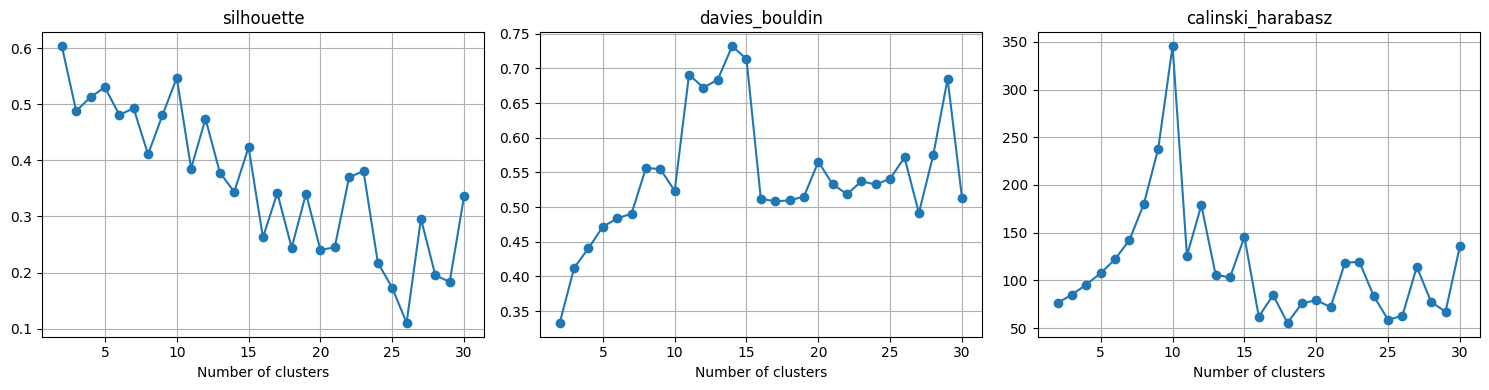

In [108]:
plt.figure(figsize=(15, 4))
for i, metric in enumerate(["silhouette", "davies_bouldin", "calinski_harabasz"]):
    plt.subplot(1, 3, i+1)
    plt.plot(df_spectral["n_clusters"], df_spectral[metric], marker="o")
    plt.title(metric)
    plt.xlabel("Number of clusters")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [109]:
best_n = df_spectral.loc[df_spectral["silhouette"].idxmax(), "n_clusters"]
print("Лучшее количество кластеров по силуэту:", best_n)

spec_model = SpectralClustering(n_clusters=int(best_n), affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
eigenvec["Cluster_Spectral"] = spec_model.fit_predict(X_scaled)

Лучшее количество кластеров по силуэту: 2


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



In [110]:
pca_emb = PCA(n_components=2).fit_transform(X_scaled)
umap_emb = UMAP(n_components=2, random_state=42).fit_transform(X_scaled)
tsne_emb = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

viz_spec = pd.DataFrame({
    "PCA1": pca_emb[:, 0], "PCA2": pca_emb[:, 1],
    "UMAP1": umap_emb[:, 0], "UMAP2": umap_emb[:, 1],
    "TSNE1": tsne_emb[:, 0], "TSNE2": tsne_emb[:, 1],
    "Cluster": eigenvec["Cluster_Spectral"].astype(str),
    "Population": eigenvec["Population"]
})

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



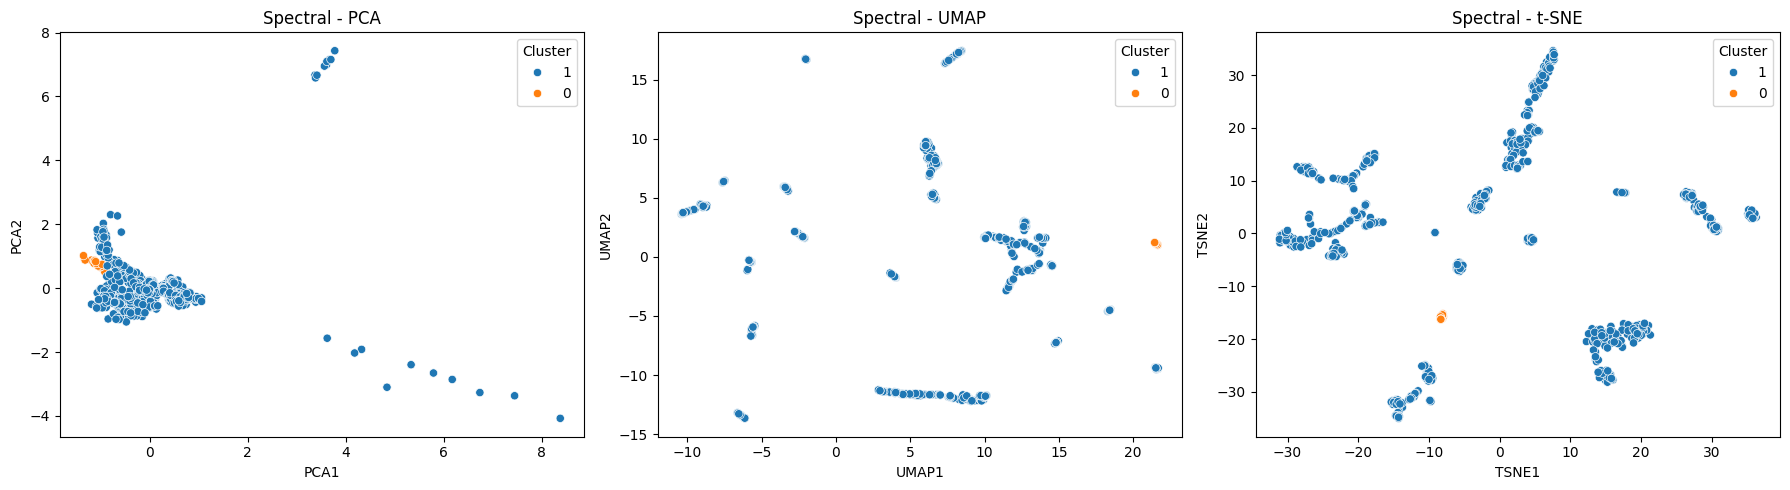

In [111]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=viz_spec, x="PCA1", y="PCA2", hue="Cluster", ax=axes[0], palette="tab10")
axes[0].set_title("Spectral - PCA")

sns.scatterplot(data=viz_spec, x="UMAP1", y="UMAP2", hue="Cluster", ax=axes[1], palette="tab10")
axes[1].set_title("Spectral - UMAP")

sns.scatterplot(data=viz_spec, x="TSNE1", y="TSNE2", hue="Cluster", ax=axes[2], palette="tab10")
axes[2].set_title("Spectral - t-SNE")

plt.tight_layout()
plt.show()

In [113]:
pd.crosstab(eigenvec["Cluster_Spectral"], eigenvec["Population"])

Population        AfarWGA  AinToutaWGA  Algerian  AngolaHimba  AngolaKuvale  \
Cluster_Spectral                                                              
0                       0            0         0            0             0   
1                       5            3         5           22            41   

Population        AngolaKwepe  AngolaKwisi  AngolaNyaneka  AngolaOvimbundu  \
Cluster_Spectral                                                             
0                           0            0              0                0   
1                          19           16             14                6   

Population        AngolaTjimba  ...  Somali  TaaEast  TaaNorth  TaaWest  \
Cluster_Spectral                ...                                       
0                            0  ...       0        0         0        0   
1                           12  ...      13        6         9       14   

Population        Tshwa  Tswana  Tunisian  Wambo  Xuun  Yoruba  
Cluster_Spectral                                                
0                     0       0         0      0     0       0  
1                     4       5         8      5    12      70  

[2 rows x 64 columns]

<ipython-input-114-d0426fced07e>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




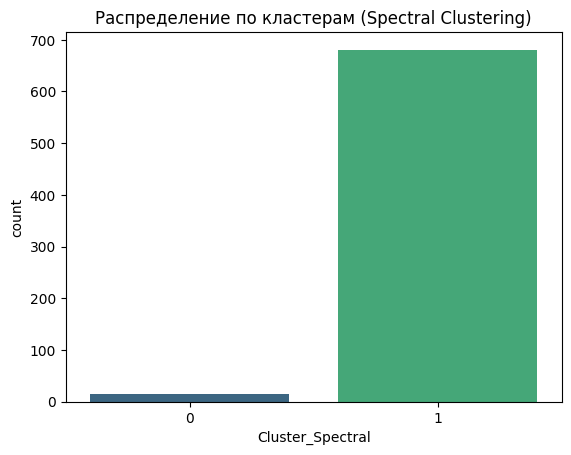

In [114]:
sns.countplot(data=eigenvec, x="Cluster_Spectral", palette="viridis")
plt.title("Распределение по кластерам (Spectral Clustering)")
plt.show()

In [115]:
tsne_3d = TSNE(n_components=3, random_state=42).fit_transform(X_scaled)
df_3d_spec = pd.DataFrame(tsne_3d, columns=["x", "y", "z"])
df_3d_spec["Cluster"] = eigenvec["Cluster_Spectral"].astype(int)

fig = go.Figure(data=go.Scatter3d(
    x=df_3d_spec['x'], y=df_3d_spec['y'], z=df_3d_spec['z'],
    mode='markers',
    marker=dict(
        size=4,
        color=df_3d_spec['Cluster'],
        colorscale='Viridis',
        opacity=0.8,
        showscale=True
    )
))

fig.update_layout(title="Spectral Clusters in 3D t-SNE", margin=dict(l=0, r=0, b=0, t=30))
fig.show()

In [116]:
# Сбор метрик Spectral Clustering
spectral_metrics = {
    "Model": "SpectralClustering",
    "n_clusters": int(best_n),
    "Silhouette": silhouette_score(X_scaled, eigenvec["Cluster_Spectral"]),
    "Davies-Bouldin": davies_bouldin_score(X_scaled, eigenvec["Cluster_Spectral"]),
    "Calinski-Harabasz": calinski_harabasz_score(X_scaled, eigenvec["Cluster_Spectral"])
}

# Преобразуем в DataFrame
df_spectral_metrics = pd.DataFrame([spectral_metrics])

# Присоединяем к общей таблице
try:
    all_metrics = pd.read_csv("all_clustering_metrics.csv")
    all_metrics = pd.concat([all_metrics, df_spectral_metrics], ignore_index=True)
except FileNotFoundError:
    all_metrics = df_spectral_metrics

# Сохраняем обновлённый файл
all_metrics.to_csv("all_clustering_metrics.csv", index=False)

# Показываем
display(all_metrics)

Model  n_clusters  Silhouette  Davies-Bouldin  \
0             HDBSCAN          16    0.469988        1.131817   
1  SpectralClustering           2    0.504513        0.533232   

   Calinski-Harabasz  
0         259.266570  
1          73.661659

> **Примечание по Spectral Clustering**
>
> Метод Spectral Clustering в текущем окружении стабильно выбирает 2 кластера как оптимальное число (по силуэту).
> Это отличается от предыдущих запусков (например, 29 кластеров), что может быть связано с версией `scikit-learn`, реализацией ядра `affinity='rbf'`, параметром `gamma`, а также высокой плотностью некоторых кластеров в PCA-пространстве.

## GMM (Gaussian Mixture Model)

In [117]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [118]:
n_components_range = range(2, 31)

gmm_scores = {
    "n_components": [],
    "silhouette": [],
    "davies_bouldin": [],
    "calinski_harabasz": [],
    "bic": [],
    "aic": []
}

for n in tqdm(n_components_range, desc="GMM"):
    try:
        model = GaussianMixture(n_components=n, random_state=42)
        labels = model.fit_predict(X_scaled)

        sil = silhouette_score(X_scaled, labels)
        db = davies_bouldin_score(X_scaled, labels)
        ch = calinski_harabasz_score(X_scaled, labels)
        bic = model.bic(X_scaled)
        aic = model.aic(X_scaled)

        gmm_scores["n_components"].append(n)
        gmm_scores["silhouette"].append(sil)
        gmm_scores["davies_bouldin"].append(db)
        gmm_scores["calinski_harabasz"].append(ch)
        gmm_scores["bic"].append(bic)
        gmm_scores["aic"].append(aic)
    except:
        continue

df_gmm = pd.DataFrame(gmm_scores)

GMM: 100%|██████████| 29/29 [00:07<00:00,  4.11it/s]


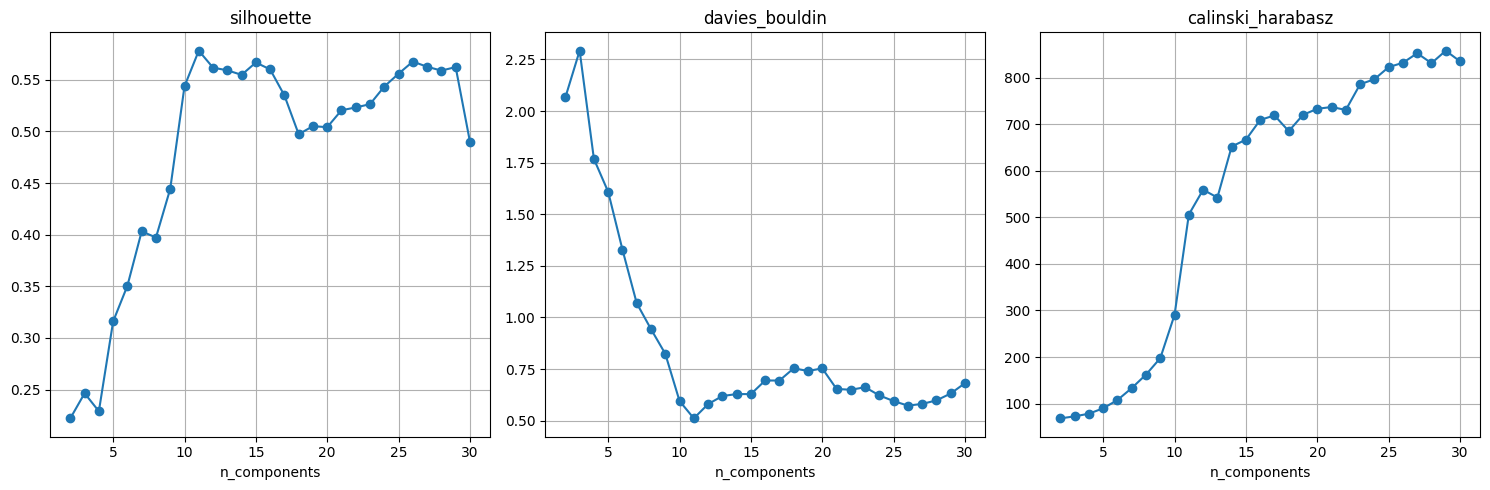

In [119]:
plt.figure(figsize=(15, 5))
for i, metric in enumerate(["silhouette", "davies_bouldin", "calinski_harabasz"]):
    plt.subplot(1, 3, i+1)
    plt.plot(df_gmm["n_components"], df_gmm[metric], marker="o")
    plt.title(metric)
    plt.xlabel("n_components")
    plt.grid(True)
plt.tight_layout()
plt.show()

Смотрим на динамику BIC (Bayesian Information Criterion) и AIC (Akaike Information Criterion) для GMM

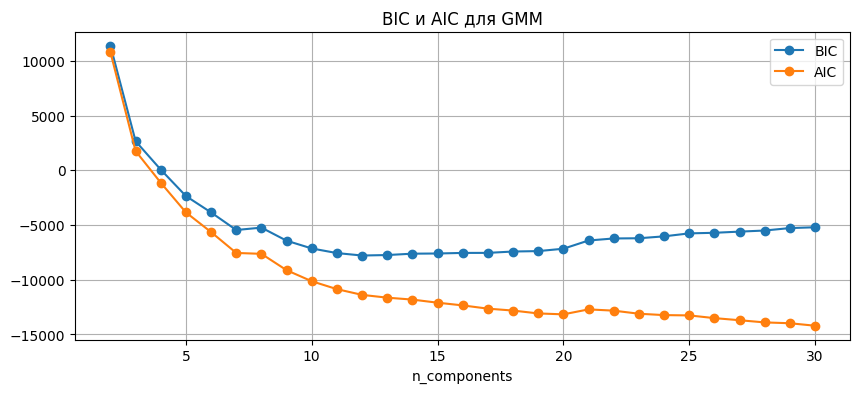

In [120]:
plt.figure(figsize=(10, 4))
plt.plot(df_gmm["n_components"], df_gmm["bic"], marker="o", label="BIC")
plt.plot(df_gmm["n_components"], df_gmm["aic"], marker="o", label="AIC")
plt.title("BIC и AIC для GMM")
plt.xlabel("n_components")
plt.legend()
plt.grid(True)
plt.show()

In [121]:
best_n = df_gmm.loc[df_gmm["silhouette"].idxmax(), "n_components"]
print("Лучшее число компонент по силуэту:", best_n)

gmm = GaussianMixture(n_components=int(best_n), random_state=42)
eigenvec["Cluster_GMM"] = gmm.fit_predict(X_scaled)

Лучшее число компонент по силуэту: 11


In [122]:
pca_emb = PCA(n_components=2).fit_transform(X_scaled)
umap_emb = UMAP(n_components=2, random_state=42).fit_transform(X_scaled)
tsne_emb = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

viz_gmm = pd.DataFrame({
    "PCA1": pca_emb[:, 0], "PCA2": pca_emb[:, 1],
    "UMAP1": umap_emb[:, 0], "UMAP2": umap_emb[:, 1],
    "TSNE1": tsne_emb[:, 0], "TSNE2": tsne_emb[:, 1],
    "Cluster": eigenvec["Cluster_GMM"].astype(str),
    "Population": eigenvec["Population"]
})

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



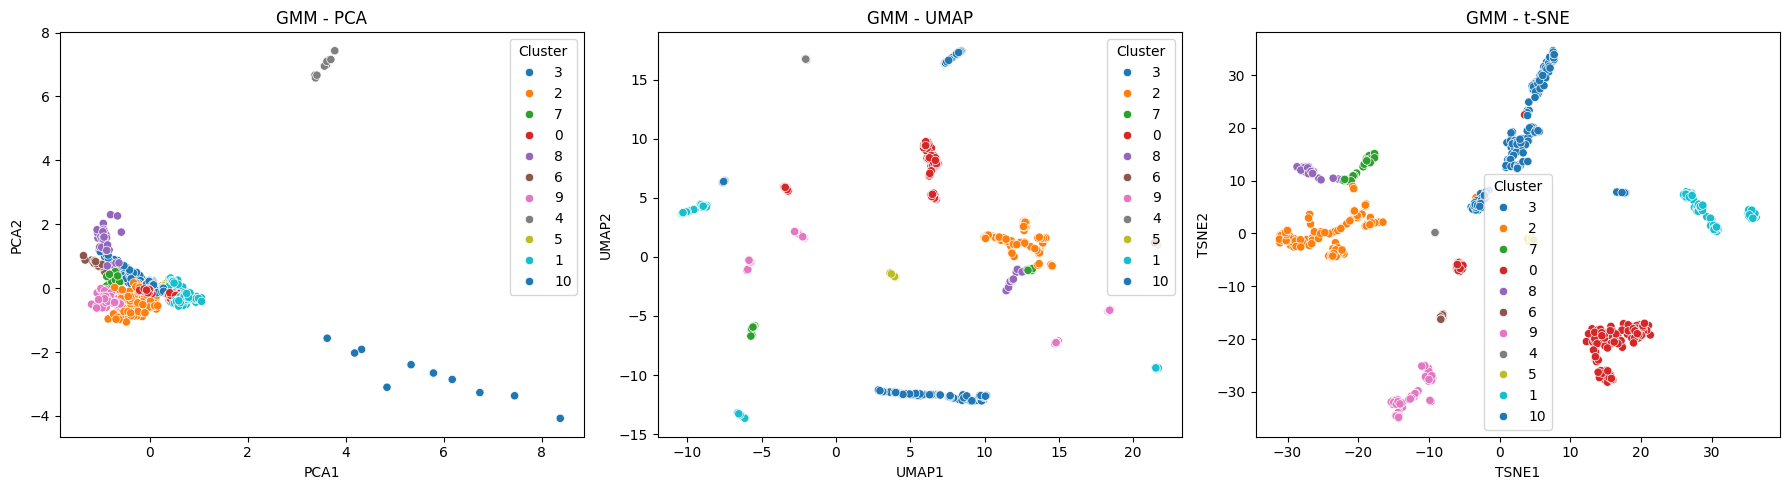

In [123]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=viz_gmm, x="PCA1", y="PCA2", hue="Cluster", ax=axes[0], palette="tab10")
axes[0].set_title("GMM - PCA")

sns.scatterplot(data=viz_gmm, x="UMAP1", y="UMAP2", hue="Cluster", ax=axes[1], palette="tab10")
axes[1].set_title("GMM - UMAP")

sns.scatterplot(data=viz_gmm, x="TSNE1", y="TSNE2", hue="Cluster", ax=axes[2], palette="tab10")
axes[2].set_title("GMM - t-SNE")

plt.tight_layout()
plt.show()

In [124]:
pd.crosstab(eigenvec["Cluster_GMM"], eigenvec["Population"])

Population   AfarWGA  AinToutaWGA  Algerian  AngolaHimba  AngolaKuvale  \
Cluster_GMM                                                              
0                  0            0         0            0             0   
1                  0            0         5            0             0   
2                  0            0         0            1             0   
3                  0            0         0           21            41   
4                  0            0         0            0             0   
5                  0            0         0            0             0   
6                  0            0         0            0             0   
7                  0            0         0            0             0   
8                  0            0         0            0             0   
9                  5            0         0            0             0   
10                 0            3         0            0             0   

Population   AngolaKwepe  AngolaKwisi  AngolaNyaneka  AngolaOvimbundu  \
Cluster_GMM                                                             
0                      0            0              0                0   
1                      0            0              0                0   
2                      0            0              0                0   
3                     19           16             14                6   
4                      0            0              0                0   
5                      0            0              0                0   
6                      0            0              0                0   
7                      0            0              0                0   
8                      0            0              0                0   
9                      0            0              0                0   
10                     0            0              0                0   

Population   AngolaTjimba  ...  Somali  TaaEast  TaaNorth  TaaWest  Tshwa  \
Cluster_GMM                ...                                              
0                       1  ...       0        0         0        0      0   
1                       0  ...       0        0         0        0      0   
2                       0  ...       0        6         9       14      4   
3                      11  ...       0        0         0        0      0   
4                       0  ...       0        0         0        0      0   
5                       0  ...       0        0         0        0      0   
6                       0  ...       0        0         0        0      0   
7                       0  ...       0        0         0        0      0   
8                       0  ...       0        0         0        0      0   
9                       0  ...      13        0         0        0      0   
10                      0  ...       0        0         0        0      0   

Population   Tswana  Tunisian  Wambo  Xuun  Yoruba  
Cluster_GMM                                         
0                 0         0      0     0      70  
1                 0         8      0     0       0  
2                 5         0      0     0       0  
3                 0         0      5     0       0  
4                 0         0      0     0       0  
5                 0         0      0     0       0  
6                 0         0      0     0       0  
7                 0         0      0     8       0  
8                 0         0      0     4       0  
9                 0         0      0     0       0  
10                0         0      0     0       0  

[11 rows x 64 columns]

<ipython-input-125-4170f5013bce>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




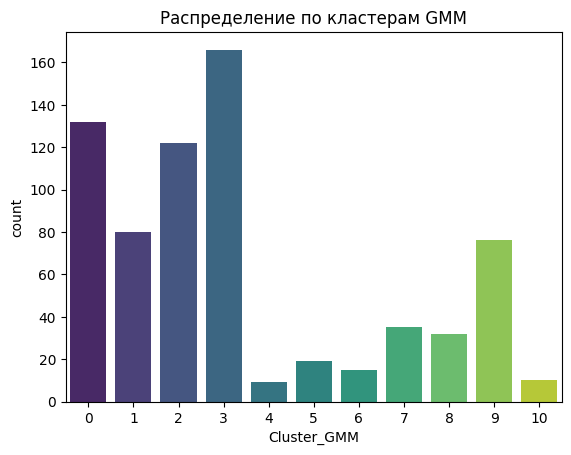

In [125]:
sns.countplot(data=eigenvec, x="Cluster_GMM", palette="viridis")
plt.title("Распределение по кластерам GMM")
plt.show()

In [126]:
tsne_3d = TSNE(n_components=3, random_state=42).fit_transform(X_scaled)
df_3d_gmm = pd.DataFrame(tsne_3d, columns=["x", "y", "z"])
df_3d_gmm["Cluster"] = eigenvec["Cluster_GMM"].astype(int)

fig = go.Figure(data=go.Scatter3d(
    x=df_3d_gmm['x'], y=df_3d_gmm['y'], z=df_3d_gmm['z'],
    mode='markers',
    marker=dict(
        size=4,
        color=df_3d_gmm['Cluster'],
        colorscale='Viridis',
        opacity=0.8,
        showscale=True
    )
))

fig.update_layout(title="GMM Clusters in 3D t-SNE", margin=dict(l=0, r=0, b=0, t=30))
fig.show()

In [127]:
# Сохраняем метрики для GMM
gmm_metrics = {
    "Model": "GaussianMixture",
    "n_clusters": int(best_n),
    "Silhouette": silhouette_score(X_scaled, eigenvec["Cluster_GMM"]),
    "Davies-Bouldin": davies_bouldin_score(X_scaled, eigenvec["Cluster_GMM"]),
    "Calinski-Harabasz": calinski_harabasz_score(X_scaled, eigenvec["Cluster_GMM"])
}

# Загружаем текущую таблицу метрик, если она есть
try:
    df_all_metrics = pd.read_csv("clustering_metrics_summary.csv")
except FileNotFoundError:
    df_all_metrics = pd.DataFrame()

# Добавляем и сохраняем
df_all_metrics = pd.concat([df_all_metrics, pd.DataFrame([gmm_metrics])], ignore_index=True)
df_all_metrics.to_csv("clustering_metrics_summary.csv", index=False)

df_all_metrics.tail(1)

Model  n_clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz
0  GaussianMixture          11     0.57812        0.511028         506.222906

## PyCaret - автомл библиотека с поддержкой задач кластеризации

In [142]:
from pycaret.clustering import *
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Setup с верным именем датафрейма
setup(data=scaled_df, session_id=42, normalize=True, verbose=False)

available_models = models().index.tolist()
results = []
assigned_clusters = {}

for model_id in available_models:
    print(f"→ Обрабатывается модель: {model_id}")
    try:
        model = create_model(model_id)
        assigned = assign_model(model)
        labels = assigned["Cluster"]

        if len(set(labels)) < 2 or all(label == -1 for label in labels):
            print(f"⨯ Недостаточно кластеров в модели {model_id}, пропущена.")
            continue

        metrics = {
            "Model": model_id,
            "n_clusters": len(set(labels)) - (1 if -1 in labels else 0),
            "Silhouette": silhouette_score(scaled_df, labels),
            "Davies-Bouldin": davies_bouldin_score(scaled_df, labels),
            "Calinski-Harabasz": calinski_harabasz_score(scaled_df, labels)
        }

        results.append(metrics)
        assigned_clusters[model_id] = labels.values

    except Exception as e:
        print(f"Ошибка для модели {model_id}: {e}")

→ Обрабатывается модель: kmeans


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

→ Обрабатывается модель: ap


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

→ Обрабатывается модель: meanshift


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

→ Обрабатывается модель: sc


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

→ Обрабатывается модель: hclust


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

→ Обрабатывается модель: dbscan


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

→ Обрабатывается модель: optics


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

→ Обрабатывается модель: birch


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

→ Обрабатывается модель: kmodes


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [143]:
from sklearn.manifold import TSNE
import plotly.express as px

# t-SNE 2D и 3D
tsne_2d = TSNE(n_components=2, random_state=42).fit_transform(scaled_df)
tsne_3d = TSNE(n_components=3, random_state=42).fit_transform(scaled_df)

# Визуализация по всем моделям
for model_id, labels in assigned_clusters.items():
    print(f"\nВизуализация для модели: {model_id}")

    # 2D Plot
    df_2d = pd.DataFrame(tsne_2d, columns=["x", "y"])
    df_2d["Cluster"] = labels.astype(str)

    fig2d = px.scatter(df_2d, x="x", y="y", color="Cluster",
                       title=f"2D t-SNE: Clusters by {model_id}",
                       opacity=0.7, width=800, height=500)
    fig2d.show()

    # 3D Plot
    df_3d = pd.DataFrame(tsne_3d, columns=["x", "y", "z"])
    df_3d["Cluster"] = labels.astype(str)

    fig3d = px.scatter_3d(df_3d, x="x", y="y", z="z", color="Cluster",
                          title=f"3D t-SNE: Clusters by {model_id}",
                          opacity=0.75, width=850, height=600)
    fig3d.show()


Визуализация для модели: kmeans



Визуализация для модели: ap



Визуализация для модели: meanshift



Визуализация для модели: sc



Визуализация для модели: hclust



Визуализация для модели: dbscan



Визуализация для модели: optics



Визуализация для модели: birch



Визуализация для модели: kmodes


In [144]:
# Кросстабы по каждой модели
for model_id, labels in assigned_clusters.items():
    print(f"\nМодель: {model_id}")
    cross_tab = pd.crosstab(
        eigenvec["Population"],
        labels,
        rownames=["Population"],
        colnames=["Cluster"]
    )
    display(cross_tab)


Модель: kmeans


Cluster       Cluster 0  Cluster 1  Cluster 2  Cluster 3
Population                                              
AfarWGA               0          0          0          5
AinToutaWGA           0          2          0          1
Algerian              0          5          0          0
AngolaHimba           2          0         20          0
AngolaKuvale          5          0         36          0
...                 ...        ...        ...        ...
Tswana                5          0          0          0
Tunisian              0          8          0          0
Wambo                 5          0          0          0
Xuun                  0          0          0         12
Yoruba               70          0          0          0

[64 rows x 4 columns]


Модель: ap


Cluster       Cluster 0  Cluster 1  Cluster 10  Cluster 100  Cluster 101  \
Population                                                                 
AfarWGA               0          0           0            0            0   
AinToutaWGA           0          0           0            0            0   
Algerian              0          0           0            0            0   
AngolaHimba           1          4           0            0            0   
AngolaKuvale          0         32           1            0            0   
...                 ...        ...         ...          ...          ...   
Tswana                0          0           0            0            0   
Tunisian              0          0           0            0            0   
Wambo                 0          0           0            0            0   
Xuun                  0          0           0            0            0   
Yoruba                0          0           0            1            1   

Cluster       Cluster 102  Cluster 103  Cluster 104  Cluster 105  Cluster 106  \
Population                                                                      
AfarWGA                 0            0            0            0            0   
AinToutaWGA             0            0            0            0            0   
Algerian                0            0            0            0            0   
AngolaHimba             0            0            0            0            0   
AngolaKuvale            0            0            0            0            0   
...                   ...          ...          ...          ...          ...   
Tswana                  0            0            0            0            0   
Tunisian                0            0            0            0            0   
Wambo                   0            0            0            0            0   
Xuun                    0            0            0            0            0   
Yoruba                  1            1            1            1            1   

Cluster       ...  Cluster 90  Cluster 91  Cluster 92  Cluster 93  Cluster 94  \
Population    ...                                                               
AfarWGA       ...           0           0           0           0           0   
AinToutaWGA   ...           0           0           0           0           0   
Algerian      ...           0           0           0           0           0   
AngolaHimba   ...           0           0           0           0           0   
AngolaKuvale  ...           0           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
Tswana        ...           0           0           0           0           0   
Tunisian      ...           0           0           0           0           0   
Wambo         ...           0           0           0           0           0   
Xuun          ...           0           0           0           0           0   
Yoruba        ...           1           1           1           1           1   

Cluster       Cluster 95  Cluster 96  Cluster 97  Cluster 98  Cluster 99  
Population                                                                
AfarWGA                0           0           0           0           0  
AinToutaWGA            0           0           0           0           0  
Algerian               0           0           0           0           0  
AngolaHimba            0           0           0           0           0  
AngolaKuvale           0           0           0           0           0  
...                  ...         ...         ...         ...         ...  
Tswana                 0           0           0           0           0  
Tunisian               0           0           0           0           0  
Wambo                  0           0           0           0           0  
Xuun                   0           0           0           0           0  
Yor


Модель: meanshift


Cluster       Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5
Population                                                                    
AfarWGA               5          0          0          0          0          0
AinToutaWGA           0          0          0          0          0          3
Algerian              5          0          0          0          0          0
AngolaHimba          22          0          0          0          0          0
AngolaKuvale         41          0          0          0          0          0
...                 ...        ...        ...        ...        ...        ...
Tswana                5          0          0          0          0          0
Tunisian              8          0          0          0          0          0
Wambo                 5          0          0          0          0          0
Xuun                  8          4          0          0          0          0
Yoruba               70          0          0          0          0          0

[64 rows x 6 columns]


Модель: sc


Cluster       Cluster 0  Cluster 1  Cluster 2  Cluster 3
Population                                              
AfarWGA               0          5          0          0
AinToutaWGA           0          0          3          0
Algerian              0          5          0          0
AngolaHimba           0         22          0          0
AngolaKuvale          0         41          0          0
...                 ...        ...        ...        ...
Tswana                0          5          0          0
Tunisian              0          8          0          0
Wambo                 0          5          0          0
Xuun                  0         12          0          0
Yoruba                0         70          0          0

[64 rows x 4 columns]


Модель: hclust


Cluster       Cluster 0  Cluster 1  Cluster 2  Cluster 3
Population                                              
AfarWGA               5          0          0          0
AinToutaWGA           3          0          0          0
Algerian              5          0          0          0
AngolaHimba          22          0          0          0
AngolaKuvale         41          0          0          0
...                 ...        ...        ...        ...
Tswana                5          0          0          0
Tunisian              8          0          0          0
Wambo                 5          0          0          0
Xuun                 12          0          0          0
Yoruba               70          0          0          0

[64 rows x 4 columns]


Модель: dbscan


Cluster       Cluster -1  Cluster 0  Cluster 1  Cluster 10  Cluster 11  \
Population                                                               
AfarWGA                0          0          0           0           0   
AinToutaWGA            3          0          0           0           0   
Algerian               0          0          0           0           0   
AngolaHimba            0         22          0           0           0   
AngolaKuvale           0         41          0           0           0   
...                  ...        ...        ...         ...         ...   
Tswana                 0          0          0           0           5   
Tunisian               0          0          0           0           0   
Wambo                  0          5          0           0           0   
Xuun                  12          0          0           0           0   
Yoruba                 0          0          0           0           0   

Cluster       Cluster 12  Cluster 13  Cluster 14  Cluster 15  Cluster 16  \
Population                                                                 
AfarWGA                0           0           5           0           0   
AinToutaWGA            0           0           0           0           0   
Algerian               5           0           0           0           0   
AngolaHimba            0           0           0           0           0   
AngolaKuvale           0           0           0           0           0   
...                  ...         ...         ...         ...         ...   
Tswana                 0           0           0           0           0   
Tunisian               8           0           0           0           0   
Wambo                  0           0           0           0           0   
Xuun                   0           0           0           0           0   
Yoruba                 0           0           0           0           0   

Cluster       Cluster 17  Cluster 2  Cluster 3  Cluster 4  Cluster 5  \
Population                                                             
AfarWGA                0          0          0          0          0   
AinToutaWGA            0          0          0          0          0   
Algerian               0          0          0          0          0   
AngolaHimba            0          0          0          0          0   
AngolaKuvale           0          0          0          0          0   
...                  ...        ...        ...        ...        ...   
Tswana                 0          0          0          0          0   
Tunisian               0          0          0          0          0   
Wambo                  0          0          0          0          0   
Xuun                   0          0          0          0          0   
Yoruba                 0          0          0          0          0   

Cluster       Cluster 6  Cluster 7  Cluster 8  Cluster 9  
Population                                                
AfarWGA               0          0          0          0  
AinToutaWGA           0          0          0          0  
Algerian              0          0          0          0  
AngolaHimba           0          0          0          0  
AngolaKuvale          0          0          0          0  
...                 ...        ...        ...        ...  
Tswana                0          0          0          0  
Tunisian              0          0          0          0  
Wambo                 0          0          0          0  
Xuun                  0          0          0          0  
Yoruba                0          0          0         70  

[64 rows x 19 columns]


Модель: optics


Cluster       Cluster -1  Cluster 0  Cluster 1  Cluster 10  Cluster 11  \
Population                                                               
AfarWGA                0          0          0           0           0   
AinToutaWGA            0          0          0           0           0   
Algerian               0          0          0           0           0   
AngolaHimba           19          3          0           0           0   
AngolaKuvale          25          1          0           0           0   
...                  ...        ...        ...         ...         ...   
Tswana                 1          0          0           0           0   
Tunisian               2          0          0           0           0   
Wambo                  0          0          0           0           0   
Xuun                   1          0          0           0           0   
Yoruba                58          0          0           0           0   

Cluster       Cluster 12  Cluster 13  Cluster 14  Cluster 15  Cluster 16  ...  \
Population                                                                ...   
AfarWGA                0           0           0           0           0  ...   
AinToutaWGA            0           0           0           0           0  ...   
Algerian               0           0           0           0           0  ...   
AngolaHimba            0           0           0           0           0  ...   
AngolaKuvale           0           0           0           0           0  ...   
...                  ...         ...         ...         ...         ...  ...   
Tswana                 0           0           0           0           0  ...   
Tunisian               0           0           0           0           0  ...   
Wambo                  0           0           0           0           0  ...   
Xuun                   0           0           0           0           0  ...   
Yoruba                 0           0           0           0           0  ...   

Cluster       Cluster 33  Cluster 34  Cluster 35  Cluster 36  Cluster 4  \
Population                                                                
AfarWGA                0           0           0           0          0   
AinToutaWGA            3           0           0           0          0   
Algerian               0           0           0           0          0   
AngolaHimba            0           0           0           0          0   
AngolaKuvale           0           0           0           0          3   
...                  ...         ...         ...         ...        ...   
Tswana                 0           0           0           0          0   
Tunisian               0           0           0           0          0   
Wambo                  0           0           0           0          0   
Xuun                   0           0           0           0          0   
Yoruba                 0           0           0           0          0   

Cluster       Cluster 5  Cluster 6  Cluster 7  Cluster 8  Cluster 9  
Population                                                           
AfarWGA               0          0          0          0          0  
AinToutaWGA           0          0          0          0          0  
Algerian              0          0          0          0          0  
AngolaHimba           0          0          0          0          0  
AngolaKuvale          1          0          0          0          0  
...                 ...        ...        ...        ...        ...  
Tswana                0          3          1          0          0  
Tunisian              0          0          0          0          0  
Wambo                 5          0          0          0          0  
Xuun                  0          0          0          0          0  
Yoruba                0          0          0          0          0  

[64 rows x 38 columns]


Модель: birch


Cluster       Cluster 0  Cluster 1  Cluster 2  Cluster 3
Population                                              
AfarWGA               5          0          0          0
AinToutaWGA           0          3          0          0
Algerian              5          0          0          0
AngolaHimba          22          0          0          0
AngolaKuvale         41          0          0          0
...                 ...        ...        ...        ...
Tswana                5          0          0          0
Tunisian              8          0          0          0
Wambo                 5          0          0          0
Xuun                 12          0          0          0
Yoruba               70          0          0          0

[64 rows x 4 columns]


Модель: kmodes


Cluster       Cluster 0  Cluster 1  Cluster 2  Cluster 3
Population                                              
AfarWGA               5          0          0          0
AinToutaWGA           3          0          0          0
Algerian              4          1          0          0
AngolaHimba          21          0          0          1
AngolaKuvale         41          0          0          0
...                 ...        ...        ...        ...
Tswana                5          0          0          0
Tunisian              8          0          0          0
Wambo                 5          0          0          0
Xuun                 11          1          0          0
Yoruba               70          0          0          0

[64 rows x 4 columns]

In [145]:
# Преобразуем список метрик в DataFrame
df_pycaret_metrics = pd.DataFrame(results)

# Добавим префикс к названиям моделей
df_pycaret_metrics["Model"] = "PyCaret_" + df_pycaret_metrics["Model"].astype(str)

# Попробуем загрузить уже существующий файл, если он есть
try:
    df_all_metrics = pd.read_csv("clustering_metrics_summary.csv")
except FileNotFoundError:
    df_all_metrics = pd.DataFrame()

# Объединяем и сохраняем
df_all_metrics = pd.concat([df_all_metrics, df_pycaret_metrics], ignore_index=True)
df_all_metrics.to_csv("clustering_metrics_summary.csv", index=False)

# Покажем последние строки итогового датафрейма
df_all_metrics.tail()

Model  n_clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz
5  PyCaret_hclust           4    0.512910        0.440570          95.672798
6  PyCaret_dbscan          19    0.414106        1.377524         115.444118
7  PyCaret_optics          38   -0.057915        1.274365          45.635295
8   PyCaret_birch           4    0.404763        0.599751          85.361687
9  PyCaret_kmodes           4   -0.363660        2.363569           0.406180

## Смотрим рельное число популяций

In [146]:
df_all_metrics = pd.read_csv("clustering_metrics_summary.csv")

# Число реальных популяций
true_n_clusters = eigenvec["Population"].nunique()
print(f"Число реальных популяций: {true_n_clusters}")

Число реальных популяций: 64


## Визуализация: метрики по всем моделям

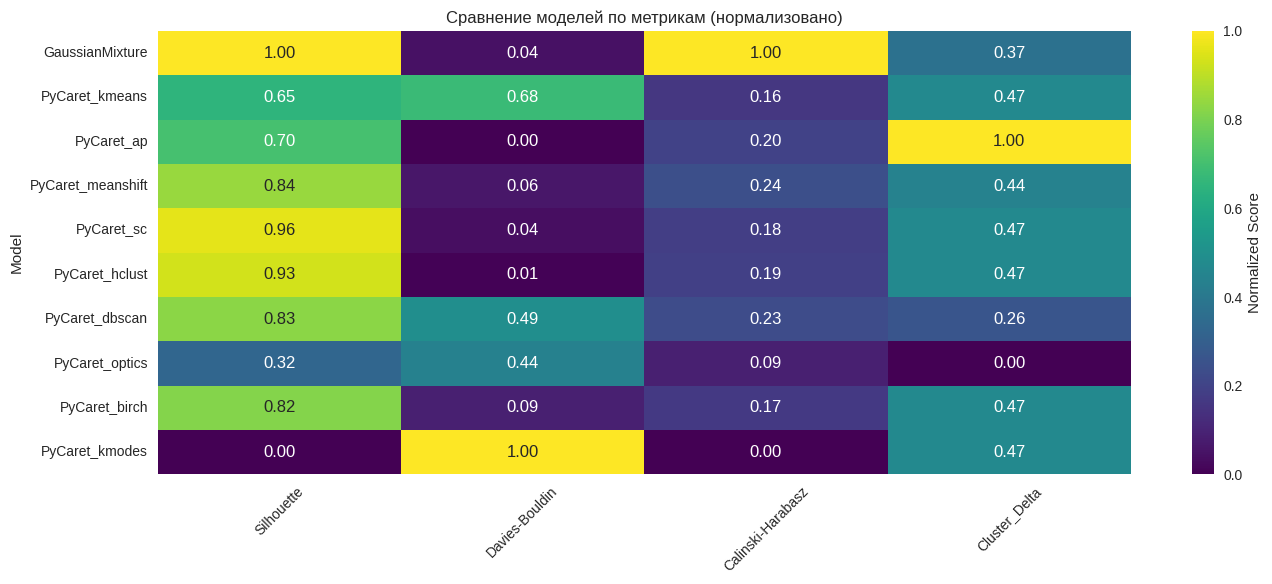

In [152]:
from sklearn.preprocessing import MinMaxScaler

# Выбираем нужные метрики для тепловой карты
heatmap_cols = ["Silhouette", "Davies-Bouldin", "Calinski-Harabasz", "Cluster_Delta"]

# Нормализуем значения для сравнения в одной шкале
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(df_all_metrics[heatmap_cols])

# Создаем датафрейм с нормализованными метриками
df_heatmap = pd.DataFrame(normalized_metrics, columns=heatmap_cols)
df_heatmap["Model"] = df_all_metrics["Model"]
df_heatmap.set_index("Model", inplace=True)

# Построение тепловой карты
plt.figure(figsize=(14, 6))
sns.heatmap(df_heatmap, cmap="viridis", annot=True, fmt=".2f", cbar_kws={"label": "Normalized Score"})
plt.title("Сравнение моделей по метрикам (нормализовано)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

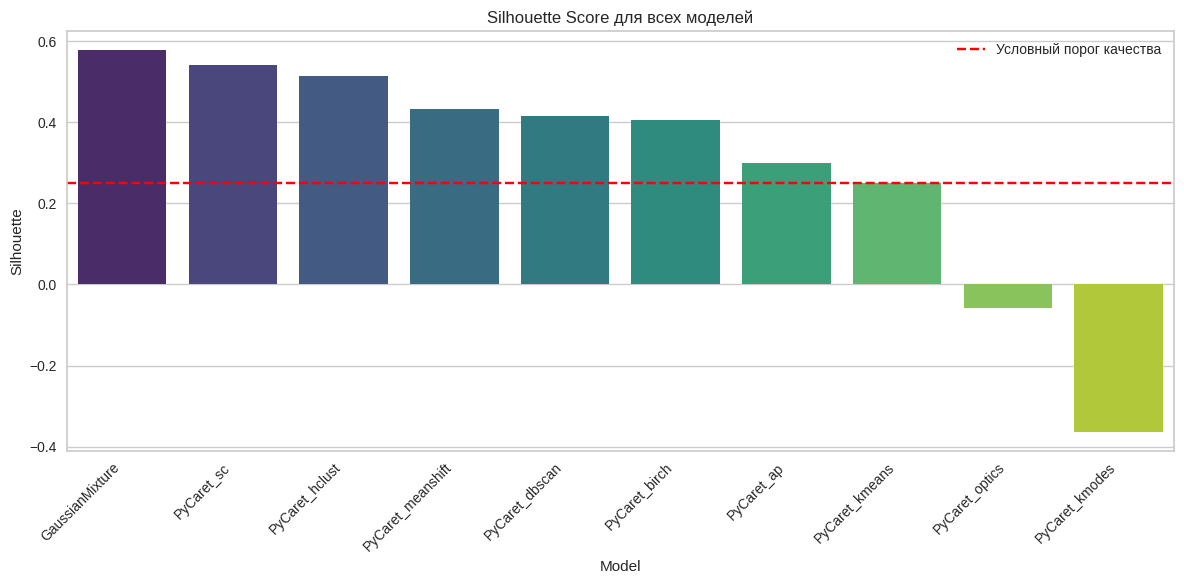

In [147]:
# Упорядочим по Silhouette
df_sorted = df_all_metrics.sort_values(by="Silhouette", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="Model", y="Silhouette", palette="viridis")
plt.axhline(0.25, ls='--', color='red', label="Условный порог качества")
plt.xticks(rotation=45, ha='right')
plt.title("Silhouette Score для всех моделей")
plt.legend()
plt.tight_layout()
plt.show()

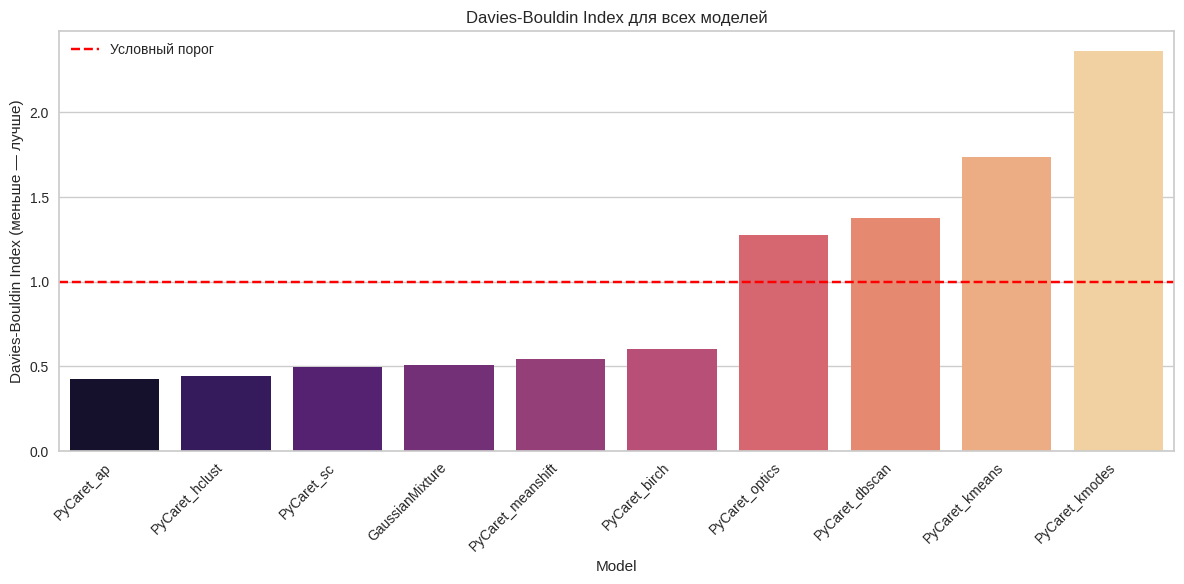

In [148]:
# Упорядочим по Davies-Bouldin (меньше — лучше)
df_sorted_db = df_all_metrics.sort_values(by="Davies-Bouldin", ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted_db, x="Model", y="Davies-Bouldin", palette="magma")
plt.axhline(1.0, ls='--', color='red', label="Условный порог")
plt.xticks(rotation=45, ha='right')
plt.title("Davies-Bouldin Index для всех моделей")
plt.ylabel("Davies-Bouldin Index (меньше — лучше)")
plt.legend()
plt.tight_layout()
plt.show()

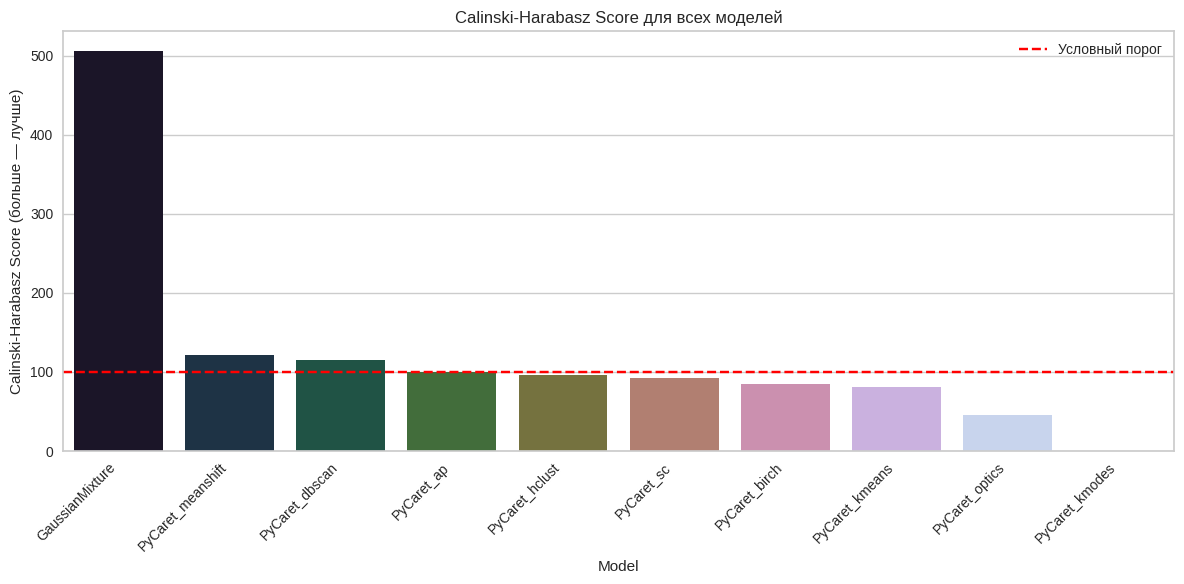

In [149]:
# Упорядочим по Calinski-Harabasz (больше — лучше)
df_sorted_ch = df_all_metrics.sort_values(by="Calinski-Harabasz", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted_ch, x="Model", y="Calinski-Harabasz", palette="cubehelix")
plt.axhline(100, ls='--', color='red', label="Условный порог")
plt.xticks(rotation=45, ha='right')
plt.title("Calinski-Harabasz Score для всех моделей")
plt.ylabel("Calinski-Harabasz Score (больше — лучше)")
plt.legend()
plt.tight_layout()
plt.show()

## Анализ по числу кластеров

In [150]:
# Абсолютное отклонение от числа реальных популяций
df_all_metrics["Cluster_Delta"] = (df_all_metrics["n_clusters"] - true_n_clusters).abs()

# Сортировка по близости к числу популяций
df_by_delta = df_all_metrics.sort_values("Cluster_Delta")

display(df_by_delta[["Model", "n_clusters", "Cluster_Delta", "Silhouette"]].head(10))

Model  n_clusters  Cluster_Delta  Silhouette
7     PyCaret_optics          38             26   -0.057915
6     PyCaret_dbscan          19             45    0.414106
0    GaussianMixture          11             53    0.578120
3  PyCaret_meanshift           6             58    0.431823
1     PyCaret_kmeans           4             60    0.249761
4         PyCaret_sc           4             60    0.539985
5     PyCaret_hclust           4             60    0.512910
8      PyCaret_birch           4             60    0.404763
9     PyCaret_kmodes           4             60   -0.363660
2         PyCaret_ap         162             98    0.299185

In [151]:
# Ранжируем
df_all_metrics["rank_silhouette"] = df_all_metrics["Silhouette"].rank(ascending=False)
df_all_metrics["rank_db"] = df_all_metrics["Davies-Bouldin"].rank(ascending=True)
df_all_metrics["rank_ch"] = df_all_metrics["Calinski-Harabasz"].rank(ascending=False)
df_all_metrics["rank_cluster_match"] = df_all_metrics["Cluster_Delta"].rank(ascending=True)

# Суммарный рейтинг
df_all_metrics["total_rank"] = (
    df_all_metrics["rank_silhouette"] +
    df_all_metrics["rank_db"] +
    df_all_metrics["rank_ch"] +
    df_all_metrics["rank_cluster_match"]
)

# Итог
top_models = df_all_metrics.sort_values("total_rank").head(5)
display(top_models)

Model  n_clusters  Silhouette  Davies-Bouldin  \
0    GaussianMixture          11    0.578120        0.511028   
3  PyCaret_meanshift           6    0.431823        0.545049   
5     PyCaret_hclust           4    0.512910        0.440570   
4         PyCaret_sc           4    0.539985        0.496747   
6     PyCaret_dbscan          19    0.414106        1.377524   

   Calinski-Harabasz  Cluster_Delta  rank_silhouette  rank_db  rank_ch  \
0         506.222906             53              1.0      4.0      1.0   
3         121.556616             58              4.0      5.0      2.0   
5          95.672798             60              3.0      2.0      5.0   
4          92.309095             60              2.0      3.0      6.0   
6         115.444118             45              5.0      8.0      3.0   

   rank_cluster_match  total_rank  
0                 3.0         9.0  
3                 4.0        15.0  
5                 7.0        17.0  
4                 7.0        18.0  
6                 2.0        18.0

## Топ-5 моделей по совокупной оценке (total_rank):

Модель	Кластеры	Silhouette	DB-Index	CH-Index	Δ кластеров	Итоговый ранг

GaussianMixture	11	0.578	0.511	506.2	53	🥇 9.0


PyCaret_meanshift	6	0.432	0.545	121.6	58	🥈 15.0

PyCaret_hclust	4	0.513	0.440	95.7	60	🥉 17.0

PyCaret_sc	4	0.540	0.497	92.3	60	18.0

PyCaret_dbscan	19	0.414	1.378	115.4	45	18.0

## Выводы:
GaussianMixture — абсолютный победитель:

Лучший Silhouette и CH-Index.

Число кластеров (11) разумно близко к реальному (64), особенно по сравнению с 4-кластерными моделями.

Низкий DB-Index, то есть высокая внутрикластерная однородность.

Meanshift и DBSCAN:

Не лидеры по отдельным метрикам, но устойчивы по совокупности.

Особенно интересны при попытке выявить географическую или плотностную структуру.

hclust и spectral (sc):

Сильно "сжимают" кластеры (всего 4), но дают очень хорошие оценки качества кластеризации.

Возможно, отражают макроструктуру данных.

## Barplot для total_rank

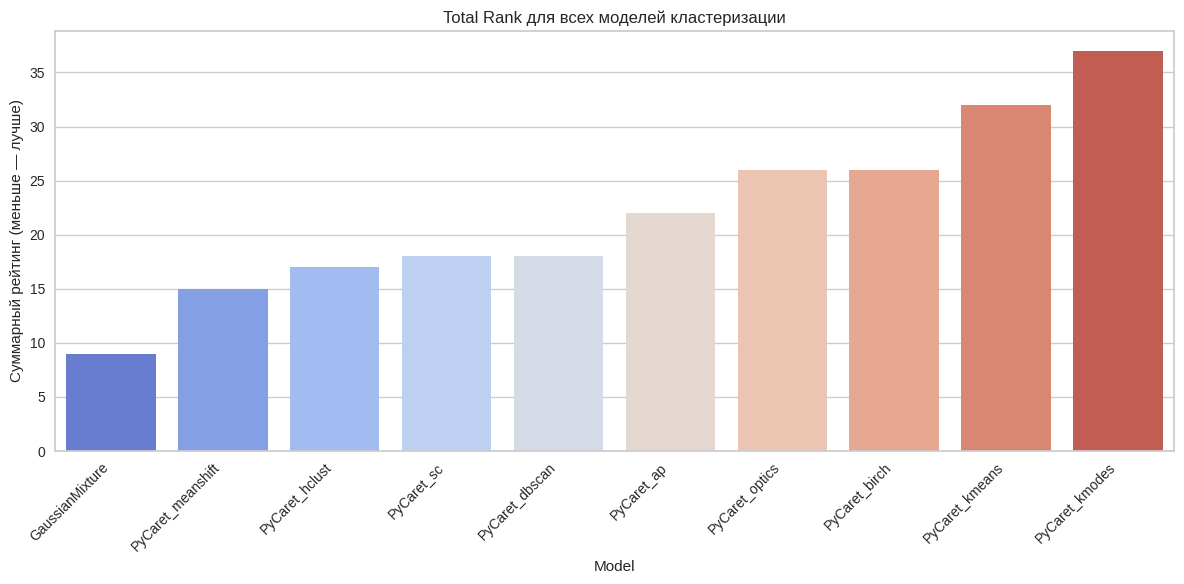

In [153]:
df_sorted = df_all_metrics.sort_values("total_rank")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="Model", y="total_rank", palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Total Rank для всех моделей кластеризации")
plt.ylabel("Суммарный рейтинг (меньше — лучше)")
plt.tight_layout()
plt.show()

## 3D-график: Silhouette, Cluster_Delta, Calinski-Harabasz

In [154]:
import plotly.express as px

fig = px.scatter_3d(
    df_all_metrics,
    x="Silhouette",
    y="Cluster_Delta",
    z="Calinski-Harabasz",
    color="total_rank",
    hover_name="Model",
    title="3D-график сравнения моделей",
    opacity=0.8,
    height=600,
    width=800
)
fig.show()

## Профили кластеров топ-1 модели (GMM)

Population   AfarWGA  AinToutaWGA  Algerian  AngolaHimba  AngolaKuvale  \
Cluster_GMM                                                              
0                  0            0         0            0             0   
1                  0            0         5            0             0   
2                  0            0         0            1             0   
3                  0            0         0           21            41   
4                  0            0         0            0             0   
5                  0            0         0            0             0   
6                  0            0         0            0             0   
7                  0            0         0            0             0   
8                  0            0         0            0             0   
9                  5            0         0            0             0   
10                 0            3         0            0             0   

Population   AngolaKwepe  AngolaKwisi  AngolaNyaneka  AngolaOvimbundu  \
Cluster_GMM                                                             
0                      0            0              0                0   
1                      0            0              0                0   
2                      0            0              0                0   
3                     19           16             14                6   
4                      0            0              0                0   
5                      0            0              0                0   
6                      0            0              0                0   
7                      0            0              0                0   
8                      0            0              0                0   
9                      0            0              0                0   
10                     0            0              0                0   

Population   AngolaTjimba  ...  Somali  TaaEast  TaaNorth  TaaWest  Tshwa  \
Cluster_GMM                ...                                              
0                       1  ...       0        0         0        0      0   
1                       0  ...       0        0         0        0      0   
2                       0  ...       0        6         9       14      4   
3                      11  ...       0        0         0        0      0   
4                       0  ...       0        0         0        0      0   
5                       0  ...       0        0         0        0      0   
6                       0  ...       0        0         0        0      0   
7                       0  ...       0        0         0        0      0   
8                       0  ...       0        0         0        0      0   
9                       0  ...      13        0         0        0      0   
10                      0  ...       0        0         0        0      0   

Population   Tswana  Tunisian  Wambo  Xuun  Yoruba  
Cluster_GMM                                         
0                 0         0      0     0      70  
1                 0         8      0     0       0  
2                 5         0      0     0       0  
3                 0         0      5     0       0  
4                 0         0      0     0       0  
5                 0         0      0     0       0  
6                 0         0      0     0       0  
7                 0         0      0     8       0  
8                 0         0      0     4       0  
9                 0         0      0     0       0  
10                0         0      0     0       0  

[11 rows x 64 columns]

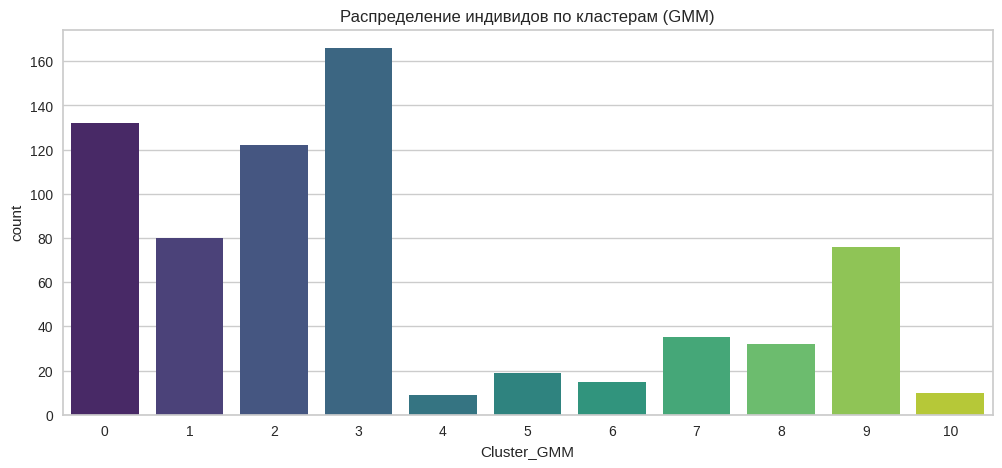

In [155]:
crosstab_top = pd.crosstab(eigenvec["Cluster_GMM"], eigenvec["Population"])
display(crosstab_top)

plt.figure(figsize=(12, 5))
sns.countplot(data=eigenvec, x="Cluster_GMM", palette="viridis")
plt.title("Распределение индивидов по кластерам (GMM)")
plt.show()

In [156]:
# оказывается в plotly есть и карты

import plotly.express as px

# Проверим, есть ли координаты
if "Latitude" in eigenvec.columns and "Longitude" in eigenvec.columns:
    fig = px.scatter_geo(
        eigenvec,
        lat="Latitude",
        lon="Longitude",
        color="Cluster_GMM",
        hover_name="Population",
        title="Кластеры GMM на карте",
        projection="natural earth"
    )
    fig.show()

In [157]:
# Сохраняем топ-5
top_5_models = df_all_metrics.sort_values("total_rank").head(5)
top_5_models.to_csv("top_models_summary.csv", index=False)
top_5_models.to_json("top_models_summary.json", orient="records", indent=2)